
<small><img src=https://raw.githubusercontent.com/ia4legos/MachineLearning/main/images/IASAC-UMH.png width="450" height="200"></small>




# <font color="steelblue">Modelos lineales de regresión para respuesta cuantitativa I</font>

**Autoría**: 

*   Fernando Borrás (f.borras@umh.es)
*   Federico Botella (federico@umh.es)
*   Inés Hernández (ines.hernandezp@umh.es)
*   Mª Asunción Martínez Mayoral (asun.mayoral@umh.es)
*   Josep Moltó (j.molto@umh.es)
*   Javier Morales (j.morales@umh.es) 

Departamento de Estadística, Matemáticas e Informática. 

Universidad Miguel Hernández de Elche. 


**Financiación**: El material que aparece a continuación se ha desarrollado dentro del marco del proyecto UNIDIGITAL- IASAC.

**Fecha última edición**: 01/03/2023

**Licencia**: <small><a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /></small>

No olvides hacer una copia si deseas utilizarlo. Al usar estos contenidos, acepta nuestros términos de uso y nuestra política de privacidad. 


## <font color="steelblue">Configuración del cuaderno</font>

Para garantizar la funcionalidad completa de este cuaderno, es preciso ejecutar la celda de código a continuación.

In [ ]:
#@title <b><font color="steelblue" size="+1"> Configuración de cuaderno

# Cargamos módulos
from io import StringIO 
import sys
import numpy as np      # importamos numpy como np
import pandas as pd     # importamos pandas como pd
import math             # importamos módulo para cáculos matemáticos

# Esta línea configura matplotlib para mostrar las figuras incrustadas en el jupyter notebook
# Configuraciónde entorno gráfico
%matplotlib inline
import matplotlib.pyplot as plt # importamos matplotlib como plt
import seaborn as sns # importamos seaborn como sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

with Capturing() as output:
    print('Comenzamos....')

with Capturing(output) as output:
    # Librerías
    import os
    !pip install jupyterquiz
    from jupyterquiz import display_quiz
    import json
    import base64
    # Lectura ficheros json
    # A configurar pra cada cuaderno en función de las preguntas de autoevalaución
    for i in range(1,7):
      !wget {f"https://raw.githubusercontent.com/ia4legos/MachineLearning/main/autoeval/auto_50_{i}.json"}
    print("Cuaderno configurado")

if output[-1]=='Cuaderno configurado':
    print(output[-1])
else: 
    print(output[:-2])

Cuaderno configurado


# <font color="steelblue">Introducción</font>

**Descripción:** En este cuaderno se realiza una aproximación a los modelos lineales utilizados en problemas de regresión. Se detallan todas las características de estos modelos y se presenta como obtenerlos utilizando la librería Scikit-Learn. Se introducen las primeras herramientas para la mejora del modelo de partida y todo ello se ejempifica sobre diferentes ejemplos simulados y reales.

**Nivel de Formación:** B

**Recomendaciones antes de usarlo:** Resulta de utilidad conocimientos básicos de estadística, así como haber cursado los cuadernos correspondientes a la librería Scikit-Learn.

## <font color="steelblue">Objetivos de aprendizaje</font>

* Desarrollar modelos lineales para representar las relaciones entre respuesta y predictoras.
* Conocer las funciones necesarias para la obtención de modelos lineales utilizando la librería Scikit-learn.
* Estudiar las diferentes métricas que valoran la capacidad predictiva de los modelos lineales.
* Establecer estrategias que nos permitan estudiar la estabilidad de la solución planteada, así como el desarrollo de procedimientos de validación cruzada.

## <font color="steelblue">Contenidos</font>

*   ¿Qué son los modelos de regresión lineal?
*   Formulación del modelo 
  *   Modelo de Regresión Lineal Simple
  *   Modelo Lineal General
*   Modelo Lineal General con Scikit-Learn
  *   Obtención del modelo
  *   Predicción
  *   Capacidad explicativa del modelo
  *   Métricas de evaluación
*   Bancos de datos
*   Preparación de los datos
  *   Preprocesado
  *   División de muestras
  *   Análisis exploratorio inicial
*   Nuestro primeros modelos
*   Estabilidad de la solución
*   Validación cruzada
*   Curva de aprendizaje
*   Selección de variables predictoras de interés




# <font color="steelblue">¿Qué son los modelos de regresión lineal?</font>

Los modelos de aprendizaje automático de regresión lineal son de los más utilizados en el mundo real por su sencillez y rapidez de ejecución. Son modelos en los que se trata de explicar el comportamiento de una variable respuesta (de tipo numérico) a partir de un conjunto de variables predictoras (de tipo numérico o categórico) mediante una combinación lineal de ellas. El resultado de este tipo de modelos es obtener un valor de salida (predicción) a partir de dicha combinación lineal de forma que dicho valor se aproxime lo más posible al verdadero valor observado de la respuesta. Aplicaciones de este tipo de modelos son: análisis de  las ventas de productos, el precio futuro de la vivienda, predicción de indicadores numéricos en salud, la predicción del PIB, predicción del crecimiento de entidades biológicas, predicción del rendimiento deportivo, etc.

Estos modelos tratan de aprender únicamente sobre la relación entre la respuesta y las predictoras a partir de un montón de datos históricos. De hecho, como veremos en el punto siguiente, estos modelos no necesitan de hiperparámetos para su ajuste. Por ejemplo, si estamos interesados en la predicción del precio de la vivienda para una ciudad en particular, necestaríamos datos sobre los precios de la vivienda en varias partes de la ciudad. Cada muestra contiene información sobre cuántas habitaciones tiene la casa, a qué distancia está del centro de la ciudad, a qué distancia está del aeropuerto, si hay un hospital cerca, etc. La próxima vez, cuando se esté interesado en el precio de una vivienda que no está en el conjunto de datos utilizado, podremos utilizar la información de la característica de la vivienda para que utilizando el modelo obtenido podamos proporcionar una previsión de precios.

Entre las ventajas de este tipo de modelos encontramos que los resultados se pueden interpretar fácilmente y es más rápido de entrenar que otros modelos de aprendizaje automático. La parte negativa es que asume una combinación lineal entre las predictoras y la respuesta, lo que en muchas situaciones reales puede ser díficil de cumplir, además de que es sensible a los valores atípicos, de foma que el modelo puede tener cambios drásticos debido a la presencia de dichas observaciones.

## Autoevaluación

Escoge las respuesta correctas de la siguiente pregunta (solo hay dos correctas):

In [ ]:
#@title <b><font color="steelblue"> Pregunta interactiva
display_quiz(json.loads(base64.b64decode(open("auto_50_1.json","rb").read()).decode('utf8')))

# <font color="steelblue">Formulación del modelo</font>

A continuación se presentan brevemente los conceptos teóricos más relevantes de los modelos lineales de regresión con respuesta numérica.

## <font color="steelblue">Modelo de Regresión Lineal Simple</font>

Para ilustrar las características de este modelo de aprendizaje comenzamos con el modelo más sencillo en el que únicamente consideramos una variable predictora de tipo numérico ($x$), conocido como modelo de regresión lienal simple y que se expresa matemáticamente como:

$$y = w_0 + w_1x + \epsilon,$$

donde:

* $w_0$ se conoce como interceptación o sesgo y representa el valor medio de la respuesta cuando la variable predictora no tiene influencia sobre ella, y se utiliza como modelo de partida.

* $w_1$ se conoce como pendiente y representa la variación de la respuesta al aumentar en una unidad el valor de la predictora, es decir, el cambio que sufre $y$ cuando pasamos de $x$ a $x+1$, de forma que el valor de $w_1$ determina si la relación entre $x$ e $y$ es directa (valor positivo) o inversa (valor negativo).

* $\epsilon$ se conoce como error aleatorio y representa la diferencia entre el valor observado de la respuesta y el valor predicho por el modelo, teniendo en cuenta que los valores de la respuesta para un mismo valor de la predictora pueden ser diferentes debido a otras variables que no aparecen en nuestro modelo de aprendizaje.

Tanto $w_0$ como $w_1$ son las cantidades deconocidas que el algoritmo debe estimar para alcanzar el modelo de predicción:

$$\hat{y} = \hat{w_0} + \hat{w_1}x,$$

donde el símbolo $^$ indica los valores estimados mediante el modelo de $w_0$ y $w_1$, mientras que el error estimado viene dado por la diferencia entre el valor observado y el predicho por el modelo:

$$\hat{\epsilon} = y - \hat{y}.$$

Es evidente que cuanto menor sea el error estimado mejor será nuestro modelo, ya que más cerca estará el valor predicho del valor real observado. De hecho, las funciones de pérdida para este tipo de modelos se basan en estimar los valores de $w_0$ y $w_1$ de forma que el error cometido sea lo más pequeño posible. 

De forma general, el modelo anterior se suele expresar en notación matricial como:

$$y = Xw + \epsilon$$

donde la primera columna de $X$ es toda de unos para representar el efecto asociado a $w_0$, de forma que en realidad la matriz $X$ viene dada por $(1| x)$, es decir una matriz con dos columnas.

Dado un conjunto de datos $\{(y_i, x_i)\}_{i=1}^n$, la función de pérdida habitual es el error cuadrático medio definido como:

$$\frac{1}{n}\sum_{i_1}^n (y_i - \hat{y}_i)^2$$ de donde se pueden obtener los valores estimados de $w_0$ y $w_1$ minimizando dicha cantidad para el rango de valores posibles de ambos parámetros. Gráficamente tenemos: 

<center><small><img src=https://raw.githubusercontent.com/ia4legos/MachineLearning/main/images/rls.png width="450" height="350"></small></center>

donde los puntos representan los pares de puntos $(x_i, y_i)$, la línea roja sería el modelo de regresión estimado, y la líneas verticales negras representan el error cometido por el modelo para cada muestra del conjunto de datos. Se trata pues de obtener el modelo que minimice el error conjunto para todos los elementos de la muestra.

La solución para  $w = (w_0, w_1)$ se obtiene entonces como el cuadrado de la norma 2 sobre los errores:

$$\underset{w}{min} ||y-Xw||_2^2,$$

que es la forma matemática de la minimización del error cuadrático medio.

## <font color="steelblue">Modelo Lineal General</font>

El Modelo Lineal General es una generalización del modelo anterior donde se dispone de una variable respuesta ($y$) de tipo numérico y una matriz de variables predictoras de tipo numérico y/o categórico, a partir del cual podemos obtener la matriz $X$ mediante la codificación de las variables de tipo categórico junto las variables de tipo numérico. Si disponemos de $p$ posibles predictoras el conjunto de datos 

$$\{(y_i, x_{1i},...x_{pi})\}_{i=1}^n$$

nos porporciona los datos para la obtención de este modelo donde $x_{ji}$ es el valor de la muestra $i$ en la predictora $j$, de forma que la ecuación del Modelo Lineal General viene dada por:

$$y = w_0 + w_1X_1+...+w_pX_p + \epsilon$$

donde cada $w_j$ representa la pendiente o variación de la respuesta con respecto a cada predictora, y $w_0$ representa el sesgo del modelo. 

Como en el caso anterior el ajuste de este modelo se basa en obtener los valores de $\hat{w}_0, \hat{w}_1,...,\hat{w}_p$ que minimizen el error cuadrático medio de los errores del modelo obtenidos como:

$$y - \hat{y} = y -  \hat{w}_0 + \hat{w}_1X_1+...+\hat{w}_pX_p$$

De forma general, el modelo anterior se suele expresar en notación matricial como:

$$y = Xw + \epsilon$$

donde la primera columna de $X$ es toda de unos para representar el efecto asociado a $w_0$, de forma que en realidad la matriz $X$ viene dada por $(1| X_1,...,X_p)$, es decir una matriz con $p+1$ columnas.

Al igual que en el caso más simple, la solución de  $w = (w_0, w_1,...,w_p)$ se obtiene mediante la expresión:

$$\underset{w}{min} ||y-Xw||_2^2$$

Como veremos más adelante, uno de los principales problemas que nos encontramos con este tipo de modelos es determinar que subconjunto de $X$ es relevante para explicar el comportamiento de la respuesta. Dado que cada predictora numérica puede estar medida en escalas diferentes, es necesario expresar dichas variables en escala estandarizada para determinar la relevancia de cada una de ellas sobre la respuesta, ya que de lo contrario los pesos $w_j$ no son comparables para dos predictoras medidas en escalas distintas. 

El procedimiento habitual es corregir cada variable por su media y dividir por la norma 2 de sus valores para que las nuevas variables tengan media cero y varianza similar. Si todas las predictoras son de tipo numérico el modelo lineal se expresa como:

$$y' = w'_0 + w'_1X'_1+...+w'_pX'_p+ \epsilon$$

donde $y', X'_1,...,X'_p$ son las variables normalizadas y los coeficientes $w'_j$ ahora si son comparables para el conjunto de predictoras, de forma que los valores más grandes en valor absoluto indican mayor peso sobre la respuesta, mientras que el signo del coficiente indica si la relación es directa o inversa con la respuesta. 

## Autoevaluación

Escoge la respuesta correcta de la siguiente pregunta (solo hay una correcta):

In [ ]:
#@title <b><font color="steelblue"> Pregunta interactiva
display_quiz(json.loads(base64.b64decode(open("auto_50_2.json","rb").read()).decode('utf8')))

# <font color="steelblue">Modelo Lineal General con Scikit-Learn</font>

En este apartado se presentan las funciones principales para la construcción y evaluación de los modelos lineales con respuesta numérica. Se han establecido tres apartados: entrenamiento del modelo, capacidad explicativa del modelo y predicción.

## <font color="steelblue">Obtención del modelo</font>

Para la implementación de modelos lineales con respuesta cuantitativa utilizamos la función [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de la clase `sklearn.linear_model`. 

El parámetro básico para la configuración de esta función es:

* **fit_intercept : *bool, default=True***. Si es `True` calcula la interceptación o sesgo ($w_0$) para este modelo. 


El resultado de esta función es un objeto de la clase modelos lineales que tiene asociados diferentes métodos. A continuación, vemos el código para crear el ajuste y presentamos los diferentes métodos.

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

El primer método es el que nos permite realizar el entrenamiento del modelo `fit` donde debemos especificar la matriz de predictoras y la respuesta:

```
modelo.fit(X, y)
```

Podemos obtener las condiciones de ajuste del modelo con el método `get_params()`

```
modelo.get_params()
```

y los parámetros del modelo (interceptación y pendientes) con las funciones:

```
modelo.intercept_
modelo.coef_
```


## <font color="steelblue">Predicción</font>


Para obtener los valores predichos para la muestra de validación (`X_test`) a partir del modelo entrenado se usa el método `predict`:

```
modelo.predict(X_test)
```

Alternativamente podemos usar los datos de entrenamiento `X_train` para obtener los valores ajustados por el modelo (\hat{y}):

```
modelo.predict(X_train)
```

## <font color="steelblue">Capacidad explicativa del modelo</font>

La capacidad explicativa de un modelo hace referencia a como explican las variables predictoras consideradas el comportamiento de la respuesta, es decir, si la predicción obtenida  a partir de ellas se parece a los valores reales observados de la respuesta. En este tipo de modelos se establecen dos medidas principales para valorar la capacidad explicativa (a parte de las funciones de pérdida habituales en todos los modelos de aprendizaje):

**Coeficiente $R^2$**, que es un indicador que toma valores entre 0 y 1, de forma que valores próximos a cero indican poca capacidad explicativa, mientras que valores próximos a 1 indican alta capacidad explicativa. Para obtener este coeficiente podemos usar el método `score(X, y)` que nos permite obtener tanto el *score* para la muestra de entrenamiento como para la de validación:

```
modelo.score(X,y)
```

De forma habitual, el valor de $R^2$ se suele expresar en términos de porcentaje para una mejor comprensión de la capacidad explicativa del modelo.

**Test F de la regresión**. El problema con este indicador es que sigue creciendo conforme aumentamos el número de predictoras aunque estas no estén relacionadas con la respuesta, ya que no nos proporciona una medida de la relevancia de la capacidad explicativa de cada variable predictora sobre la respuesta. Para solventar esta dificultad podemos obtener el test F de la regresión asociado con cada predictora de forma que podemos obtener qué predictora tiene una mayor capacidad explicativa (mayor valor del test F). Para obtener la variable predictora con una mayor contribución individual podemos normalizar los valores obtenidos por el mayor valor observado del test $F$. La función para obtener los valores del test F es la función [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html), dentro de la clase `sklearn.feature_selection`. El problema principal es que el test F está diseñado para capturar tendencias lineales (rectas), y no es adecuado para valorar otro tipo de tendencias. En esta situación podemos usar la `información mutua` que nos permite valorar asociación cuando no tenemos relaciones lineales. La función se encuentra dentro de la misma clase y se accede mediante [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html?highlight=mutual_info_regression#sklearn.feature_selection.mutual_info_regression).

Por otro lado, generalmente es de interés la capacidad explicativa de una predictora en la presencia del resto, que se obtiene mediante `mutual_info_regression`. Como antes, podemos normalizar los valores obtenidos para determinar qué predictoras están asociadas con la respuesta mediante un comportamiento no lineal. 


El código para la evaluación de estas medidas es:

```
from sklearn.feature_selection import f_regression, mutual_info_regression
f_test, pvalues = f_regression(X, y)
mi = mutual_info_regression(X, y)
```
Si tenemos al menos dos predictoras en nuestro modelo podemos normalizar los valores anteriores, con el objetivo de identificar las variables predictoras que son más representativas, mediante: 

```
f_test /= np.max(f_test)
mi /= np.max(mi)
```



## <font color="steelblue">Métricas de evaluación</font>

A continuación exponemos las dos métricas de evaluación principales para los modelos de regresión. Estas son el MSE y el RMSE, que se obtiene haciendo la raíz del MSE.

Para obtenerlas utilizamos el siguiente código: 

```
from sklearn.metrics import mean_squared_error
predictions = reg_model.predict(training_data_preprocessed)

```







```
mse = mean_squared_error(training_labels, predictions)
rmse = np.sqrt(mse)
```



donde `trainining_data_preprocessed` es el conjunto de entrenamiento una vez ya realizado el preprocesado y la división de los datos y `training_labels` es la variable objetivo (target).

# <font color="steelblue">Bancos de datos</font>

A continuación presentamos los diferentes ejemplos con los que ilustraremos el uso de los modelos de regresión con respuesta cuantitativa. Algunos de los ejemplos son simulados con diferentes estructuras de asociación en modelos de regresión lineal simple y dos son con bancos de datos reales para el modelo lineal general. 


## <font color="steelblue">Ejemplo 1.1</font>

Generamos un banco de datos de 65 muestras de acuerdo al modelo teórico (con errores normales centrados en cero):

$$y = 1 + 0.5x + \epsilon$$

donde la variabilidad del error es 0.1, lo que implica que habrá una alta asociación entre la predictora y la respuesta.

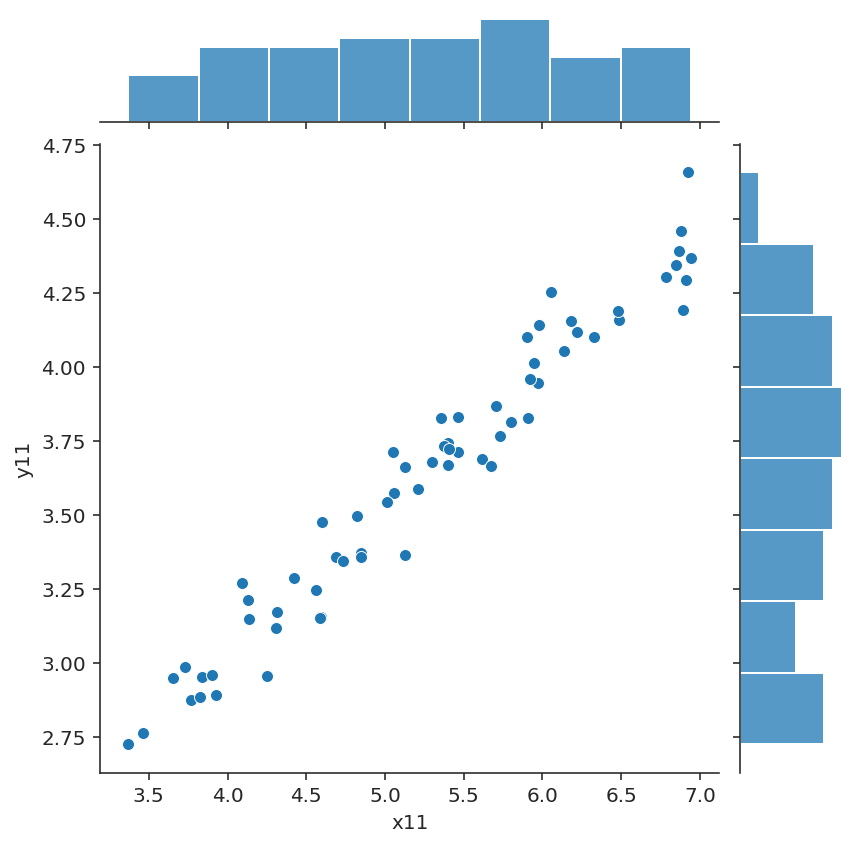

In [ ]:
# Generamos los puntos
import random
np.random.seed(0)
mu, sigma = 0, 0.1
error = np.random.normal(mu, sigma, 65)
datos1 = pd.DataFrame()
datos1['x11'] = np.random.normal(5, 1, 65)
datos1['y11'] = 1 + 0.5*datos1['x11'] + error
# Representamos gráficamente la nube de puntos obtenida
sns.jointplot(data=datos1, x="x11", y="y11");

Como podemos observar los datos tienen una tendencia bastante lineal, pues si trazáramos la diagonal del rectángulo se ajustaría bastante bien a los puntos. Además, esta tendencia es ascendente de modo que si aumenta el valor de *x* también lo hace el de *y* y viceversa.

## <font color="steelblue">Ejemplo 1.2</font>



Generamos un banco de datos de 65 muestras con el mismo modelo del ejemplo anterior, pero aumentando la variabildiad del error a tres veces la del ejemplo anterior.

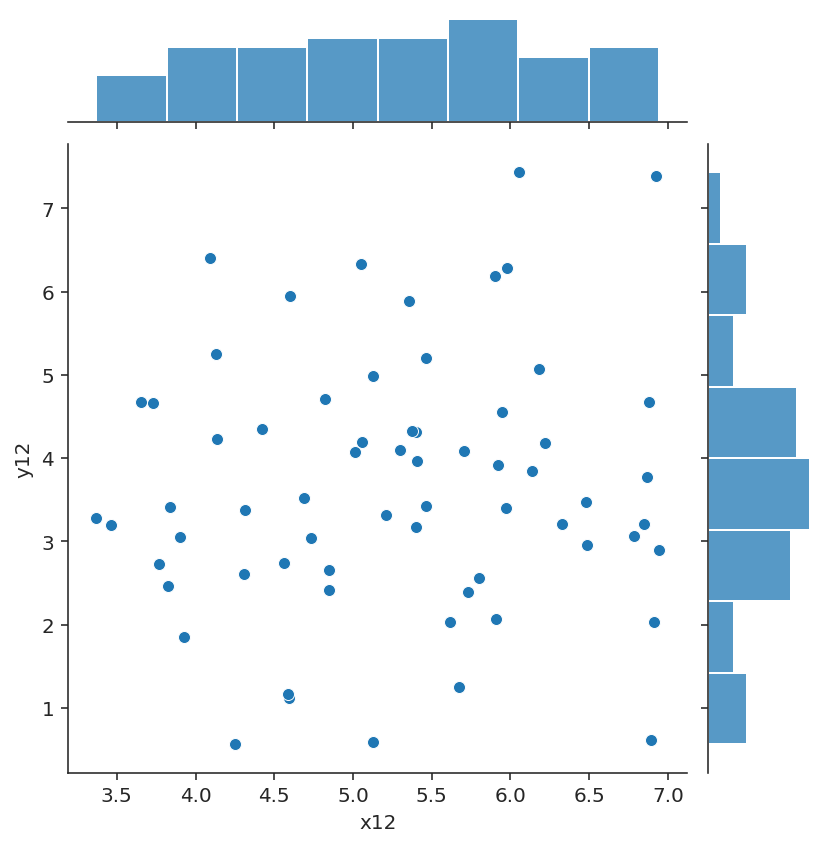

In [ ]:
# Generamos los puntos
np.random.seed(0)
mu, sigma = 0, 1.5
error = np.random.normal(mu, sigma, 65)
datos2 = pd.DataFrame()
datos2['x12'] = np.random.normal(5, 1, 65)
datos2['y12'] = 1 + 0.5*datos2['x12'] + error
# Representamos gráficamente la nube de puntos obtenida
sns.jointplot(data=datos2, x="x12", y="y12");

En este caso no queda tan clara la tendencia lineal entre predictora y respuesta debido al aumento de la variabilidad del error. Resulta por tanto evidente que nuestra capacidad predictiva para establecer el comportamiento de la respuesta es inferior en este segundo caso.

## <font color="steelblue">Ejemplo 1.3</font>

Por último, generamos un conjunto de datos donde no se aprecia una recta entre predictora y respuesta. Para ello utilizamos una transformación de la respuesta de forma que obtenemos un modelo lineal. La ecuación del modelo es:

$$y = sen(x) + \epsilon$$

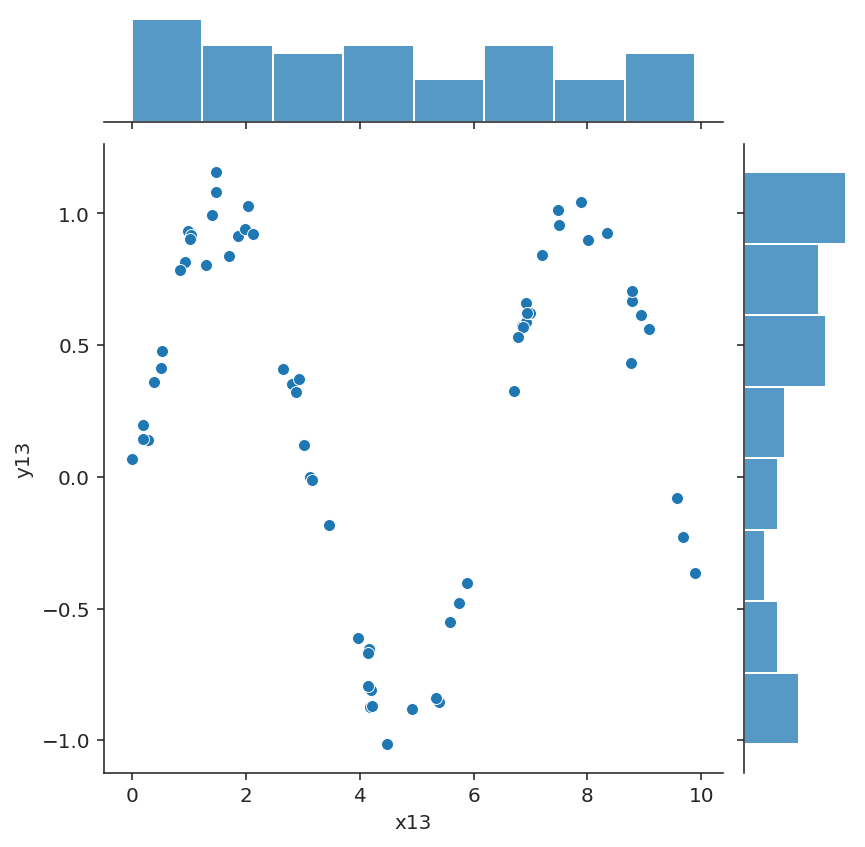

In [ ]:
# generamos los puntos
np.random.seed(0)
rng = np.random.RandomState(1)
x13 = 10 * rng.rand(65)
y13 = np.sin(x13) + 0.1 * rng.randn(65)
datos3 = pd.DataFrame()
datos3['x13'] = x13
datos3['y13'] = y13
# Representamos gráficamente la nube de puntos obtenida
sns.jointplot(data=datos3, x="x13", y="y13");

En este gráfico no observamos una tendencia clara como en el anterior, sino que esta va variando. Ajustar un modelo lineal basado en la ecuación de una recta en este caso será un error ya que la predicción que obtengamos será una mala predicción.

## <font color="steelblue">Housing</font>

En este ejemplo, utilizamos la base de datos `Housing`. El objetivo que se persigue es predecir el valor medio de las viviendas del área de Boston MA ocupadas por sus propietarios en miles de dólares (`MEDV`) 

En este caso todas las variables predictoras son de tipo numérico. El preprocesado por tanto se centrará en la detección e imputación de valores perdidos. En la lectura cargamos los nombres de las variables ya que en el fichero original no especifica los nombres de las variables.

In [ ]:
# Housing Dataset 
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/housing.data'
housing = pd.read_csv(url,header=None, sep='\s+')
# Nombres de las variables
names = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# Asignamos nombres al banco de datos
housing.columns = names
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## <font color="steelblue">HousingCA</font>

Como siguiente ejemplo utilizamos la base de datos `HousingCA`, con la finalidad de predecir el valor medio de la vivienda (`median_house_value`) de California en el año 1990.

Tenemos predictoras tanto numéricas como categóricas, y aunque en el análisis descriptivo incluiremos la longitud y la latitud, más tarde las excluiremos en la construcción del modelo. El preprocesado para este conjunto de datos se centrará en la detección e imputación de valores perdidos y la codificación de la variable categórica. En el análisis descriptivo diferenciaremos entre predictoras numéricas y categóricas.

In [ ]:
# HousingCA Dataset 
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/housing.csv'
housingCA = pd.read_csv(url)
housingCA.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# <font color="steelblue">Preparación de los datos</font>

Antes de empezar con la fase de entrenamiento del modelo es necesario preparar los datos, y realizar un pequeño análisis descriptivo sobre la muestra de entrenamiento con el objeto de estudiar el comportamiento de la variable respuesta respecto de las variables predictoras para diseñar el proceso de aprendizaje más adecuado.

En este apartado realizamos la tareas de preprocesado, la división de muestras y el análisis exploratorio de los bancos de datos correspondientes a los ejemplos 2 y 3.

## <font color="steelblue">Preprocesado</font>

En primer lugar realizamos las tareas de preprocesado y como resultado generaremos nuevos bancos de datos para cada uno de los ejemplos con los nuevos valores obtenidos de las variables durante este proceso. 

### Housing

En este caso todas la variables predictoras son de tipo numérico y las tareas de preprocesado son: identificación e imputación (si fuera necesaria) de valores perdidos, y la estandarización de las variables originales.  Comenzamos verificando la posible existencia de valores perdidos.   

In [ ]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Dado que no hay valores ausentes podemos realizar la estandarización, asignar el vector de respuestas y la matriz de predictoras para su posterior división, de cara a la fase de análisis exploratorio y entrenamiento del modelo.

In [ ]:
# Importamos módulos
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# Estandarización del conjunto de predictoras
scaler = preprocessing.StandardScaler(with_mean=False).fit(housing)
X_scaled = scaler.transform(housing)
# Dataframe estandarizado de datos
nombres = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_norm = pd.DataFrame(X_scaled, columns = nombres)
housing_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000735,0.772552,0.337051,0.0,4.647422,9.367131,2.318549,1.944260,0.114960,1.758028,7.074146,4.351754,0.698065,2.612099
1,0.003178,0.000000,1.031579,0.0,4.051377,9.147733,2.805729,2.361206,0.229921,1.437306,8.230052,4.351754,1.281188,2.350890
2,0.003176,0.000000,1.031579,0.0,4.051377,10.236173,2.172751,2.361206,0.229921,1.437306,8.230052,4.307129,0.564900,3.776660
3,0.003767,0.000000,0.318082,0.0,3.956355,9.969761,1.628674,2.881783,0.344881,1.318521,8.646179,4.326865,0.412111,3.635172
4,0.008036,0.000000,0.318082,0.0,3.956355,10.182036,1.927383,2.881783,0.344881,1.318521,8.646179,4.351754,0.747126,3.939917


Guardamos el fichero de los datos preprocesados para análisis posteriores

In [ ]:
housing_norm.to_csv("housing_clean.csv", index = False)

In [ ]:
# Asignamos
y2 = housing_norm['MEDV']
X2 = housing_norm.drop(columns=['MEDV'])

### HousingCA

Generamos ahora el banco de datos preprocesado para el banco de datos `HousingCA`. Comenzamos analizando la existencia de valores perdidos. Cabe recordar que en este caso tenemos variables numéricas y categóricas entre las predictoras.

In [ ]:
housingCA.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

En el conjunto de datos observamos que hay datos faltantes en la variable numérica `total_bedrooms`. Procedemos a la imputación de dichos valores utilizando la estrategia de la mediana. También debemos estandarizar las variables numéricas y codificar las variables categóricas. Utilizaremos los pipeline vistos en cuadernos anteriores. 

In [ ]:
# importamos las funciones necesarias
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

Para el conjunto de predictoras numéricas eliminamos del proceso de imputación y estandarización las variables que no son necesarias: la variable categórica (`ocean_proximity`), y las variables con las coordenadas geográficas (`longitude` y `latitude`).

In [ ]:
# Seleccionamos los nombres de las variables que no utilizaremos
columnas= ['ocean_proximity','longitude','latitude']
num_feats = housingCA.drop(columns= columnas)
# Pipeline para el preprocesado de la variables numéricas
num_feats_pipe = Pipeline([
                  ('imputer', SimpleImputer(strategy='median')), 
                  ('scaler', StandardScaler())                
            ])

Hemos decidido imputar por la mediana pero como el número de valores faltantes es pequeño también podríamos haber prescindido de estos datos. Otra de las opciones sería imputar en función de la localización de la variable objetivo `ocean_proximity`.

Creamos el `Pipeline` para la codificación de las variables categóricas, tomando la primera categoría de la variable (`<1H OCEAN`) como ceros, es decir, no aparece en el conjunto de nuevas variables creadas pero se pueden identificar las muestras correspondientes ya que serán aquellas en el que todas las variables creadas tomen el valor 0. 

In [ ]:
# Variable categórica
cat_feats = housingCA['ocean_proximity']
cat_feats = pd.DataFrame(cat_feats)

# Codificación en caliente
cat_feats_pipe = Pipeline([
     ('encoder', OneHotEncoder(drop='first'))                      
])

Combinamos ambos métodos en uno solo.

In [ ]:
# Variables numéricas y categóricas
num_list = list(num_feats)
cat_list = list(cat_feats)

# Transformación
final_pipe = ColumnTransformer([
   ('num', num_feats_pipe, num_list),    
   ('cat', cat_feats_pipe, cat_list)                        

])

# Datos preprocesados
data_preprocessed = final_pipe.fit_transform(housingCA)

Por defecto no nos parecen los nombres de las nuevas variables. Resulta necesario extaerlos e integrarlos todos en un dataframe.

In [ ]:
# extraemos los nombres
clf = Pipeline(steps=[('preprocessor', final_pipe)])
names_cat = clf.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(cat_list)
names_cat
# asignamos los nombres al nuevo banco de datos
names = np.concatenate((num_feats.columns, names_cat), axis = None)

Obtenemos el banco de datos preprocesado para los datos del ejemplo 3, y lo guardamos en el objeto correspondiente.

In [ ]:
# Datos preprocesados y listos para su análisis
housingCA_prepro = pd.DataFrame(data_preprocessed, columns = names)
housingCA_prepro.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,1.0,0.0
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.0,0.0,1.0,0.0
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,1.0,0.0
3,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,1.0,0.0
4,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,1.0,0.0


Guardamos el fichero preprocesado para análisis posteriores.

In [ ]:
housingCA_prepro.to_csv("housingCA_clean.csv", index = False)

Generamos la matriz de respuestas con los datos preprocesados. Utilizaremos dichos datos para el entrenamiento del modelo.

In [ ]:
# Asignamos
y3 = housingCA_prepro['median_house_value']
X3 = housingCA_prepro.drop(columns=['median_house_value'])

## <font color="steelblue">División de muestras</font>


Una vez hemos realizado el preprocesado dividimos las bases de datos en muestras de entrenamiento y validación. Utilizamos la muestra de entrenamiento de los datos preprocesados para el entrenamiento del modelo y utilizamos los datos originales para el análisis descriptivo inicial. Tomamos un 80% de muestras para los datos de entrenamiento y el 20% restante para la validación.

### Housing

In [ ]:
from sklearn.model_selection import train_test_split
# División de muestras normalizadas
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

### HousingCA

In [ ]:
# División de muestras normalizadas
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=42)

## <font color="steelblue">Análisis exploratorio inicial</font>

Realizamos ahora el análisis exploratorio inicial sobre los datos originales.

### Housing

En primer lugar analizamos la variable respuesta para conocer su comportamiento. Realizamos tanto el análisis numérico como el gráfico.

In [ ]:
housing['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

El valor medio de las viviendas se sitúa en 22.53 mientras que la variabilidad es de 9.19. Podemos ver además que el 25% de los inmuebles está por encima de los 25000\$, mientras que el 25% está por debajo de los 17000\$.

Veamos ahora el análisis gráfico:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


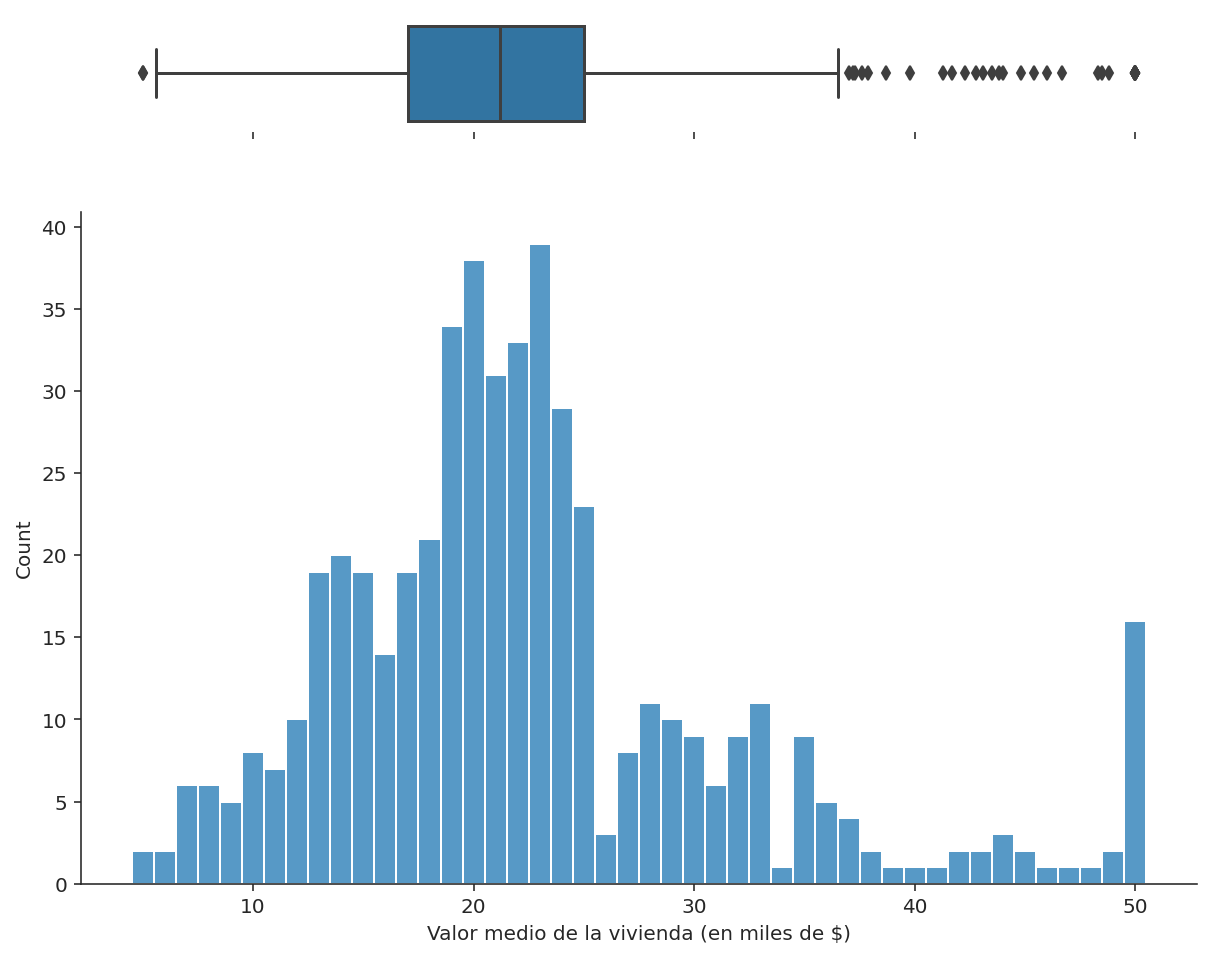

In [ ]:
# Creamos una figura conjunta con un gráfico de cajas y un histograma (ax_box and ax_hist)
f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 8))  
# assigning a graph to each ax
sns.boxplot(housing["MEDV"], ax=ax[0])
sns.despine(left=True, bottom=True, ax=ax[0])
sns.histplot(housing, x="MEDV", discrete = True, ax=ax[1])
sns.despine(right=True, top=True, ax = ax[1])
 
# Eliminamos el nombre del eje x para el boxplot
ax[0].set(xlabel='', yticks =[])
ax[1].set(xlabel='Valor medio de la vivienda (en miles de $)')
plt.show();

Podemos ver como casi el 50% de las viviendas están por debajo de los 20000$ (valor aproximado de la mediana), pero los precios se encuentran bastante repartidos (heterogeneidad en los precios). Pasamos ahora al análisis descriptivo individual de todas las predictoras:

In [ ]:
housing.drop(columns=['MEDV']).describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Se aprecia sobre todo la gran diferencia de variabilidad entre las diferentes predictoras. Como ya se ha comentado anteriormente esto puede incidir directamente en el modelo que vamos a obtener y por eso se hace necesario entrenar el algoritmo con datos estandarizados.

Como en realidad lo que nos interesa es estudiar el comportamiento de la respuesta con respecto a las posibles predictoras comenzamos con un análisis de correlación.

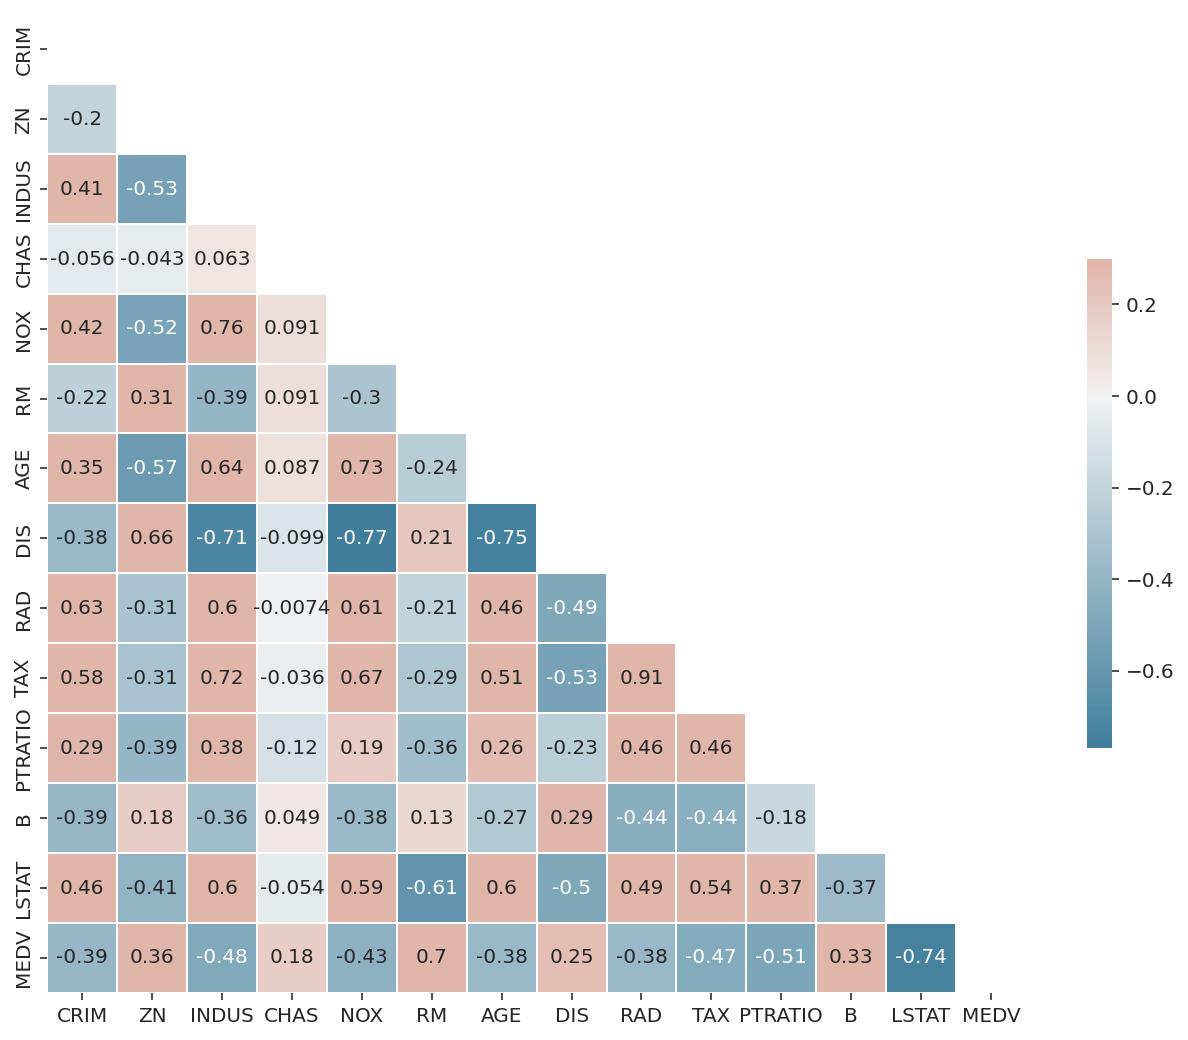

In [ ]:
# Obtenemos la matriz de correlaciones
corr = housing.corr()
# Generamos un artificio para hacer ceros por encima de la diagonal
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configuración del gráfico
f, ax = plt.subplots(figsize=(11, 9))
# Paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# gráfico de intensidad
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Nos fijamos en la última fila (que contiene los coeficientes de correlación entre la respuesta y las diferentes predictoras), y podemos ver que:

* La variable con una relación directa más fuerte (coeficientes positivos mayores que 0.4) es `RM`, es decir, cuando aumenta esta variable aumenta el valor de la respuesta.

* Las variables con una relación inversa más fuerte (coeficientes negativos menores que -0.4), es decir, cuando aumentan estas variables disminuye el valor de la respuesta son `LSTAT`, `PTRATIO`, `INDUS`, `TAX`, y `NOX`.

Vamos a representar gráficamente la asociación entre estas variables predictoras y la respuesta.

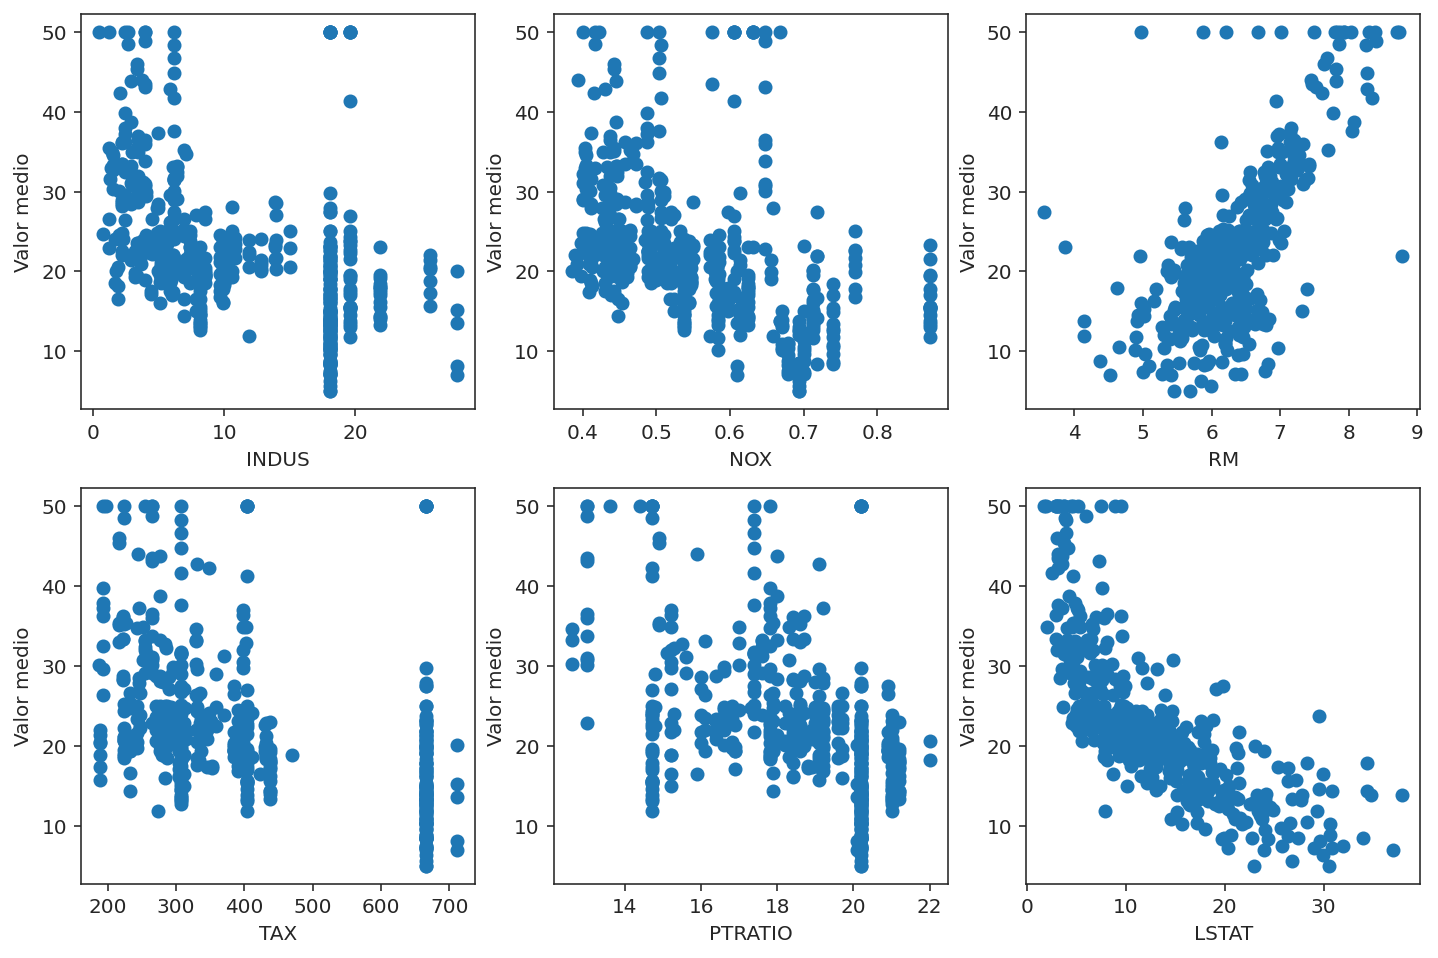

In [ ]:
# Seleccionamos las variables
variables = ['INDUS', 'NOX', 'RM', 'TAX','PTRATIO', 'LSTAT']
# Creamos el gráfico de disersión correspondiente
f, ax = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))  
j=0
for i in range(2):
  for p in range(3):
    ax[i,p].scatter(x=variables[j], y='MEDV', data = housing)
    ax[i,p].set(ylabel='Valor medio')
    ax[i,p].set(xlabel=variables[j])
    j=j+1  
plt.show()

En algunos de los gráficos se pueden observar tendencias que no parecen ser de tipo lineal, sino más bien curvilíneo. Como modelo de partida asumiremos que todas la relaciones son lineales y posteriormente veremos como mejorar dicho modelo introduciendo comportamientos no lineales.

### HousingCA

Comenzamos con el análisis descriptivo de las variables consideradas (en este caso no diferenciamos entre respuesta y predictoras). La única diferencia que establecemos es con respecto al tipo de predictora (numérica o categórica).

Comenzamos con las variables de tipo numérico.

In [ ]:
# Descripción conjunta
housingCA.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


En este caso se aprecia una gran variabildiad en el precio medio de las viviendas, ya que se sitúa en los 115395\$, mientras que la media de precios es de 206855\$. Esto se debe a que hay más del 50% de las viviendas con precio inferior a la media (distribución asimétrica de los datos) como podemos ver en el gráfico siguiente:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


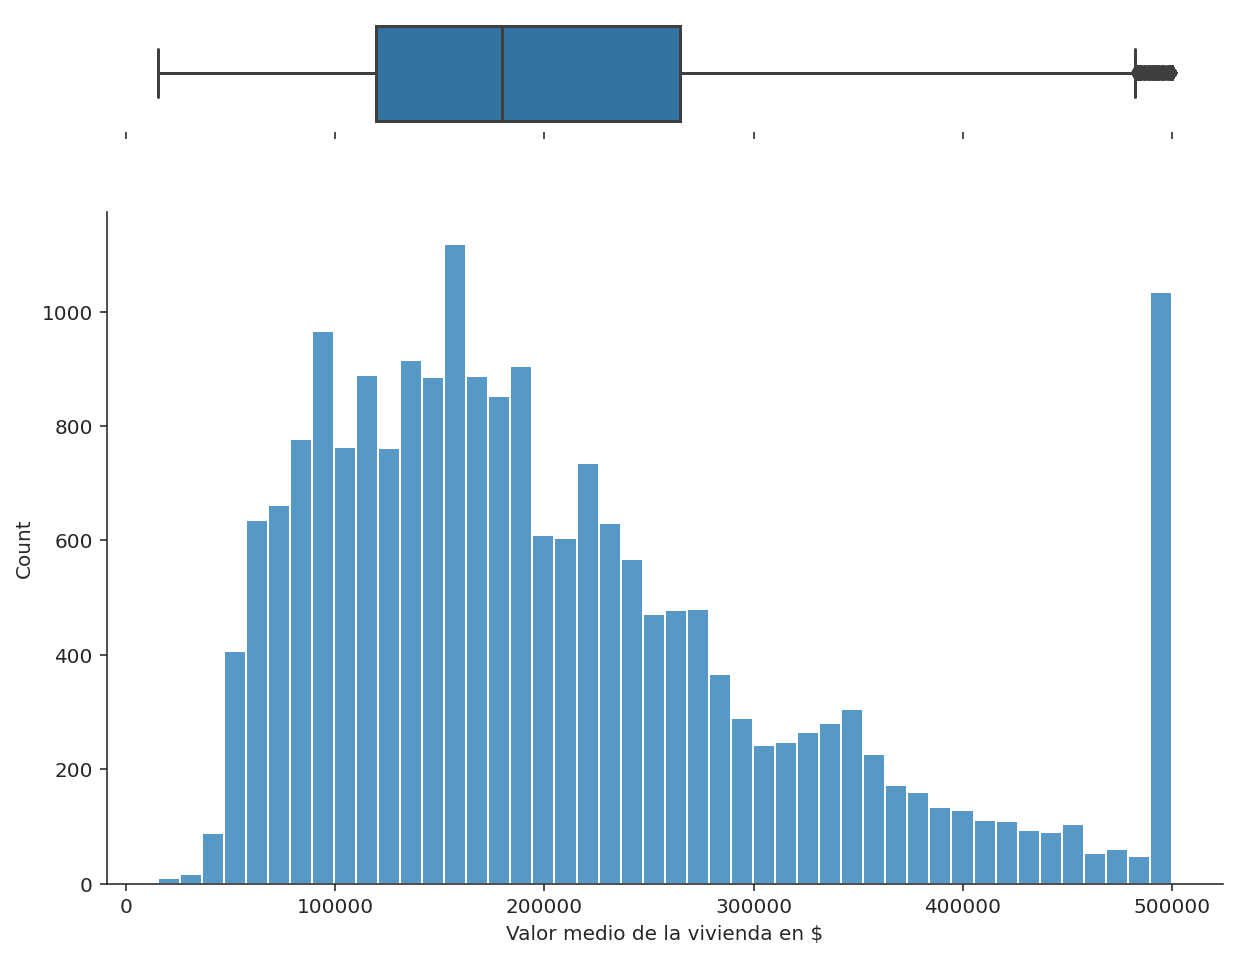

In [ ]:
# Creamos una figura conjunta con un gráfico de cajas y un histograma (ax_box and ax_hist)
f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 8))  
# Asignamos un gráfico a cada ax
sns.boxplot(housingCA["median_house_value"], ax=ax[0])
sns.despine(left=True, bottom=True, ax=ax[0])
sns.histplot(housingCA, x="median_house_value", ax=ax[1])
sns.despine(right=True, top=True, ax = ax[1])
 
# Eliminamos el nombre del eje x para el boxplot
ax[0].set(xlabel='', yticks =[])
ax[1].set(xlabel='Valor medio de la vivienda en $')
plt.show();

Obtenemos el gráfico de intensidad de las correlaciones:

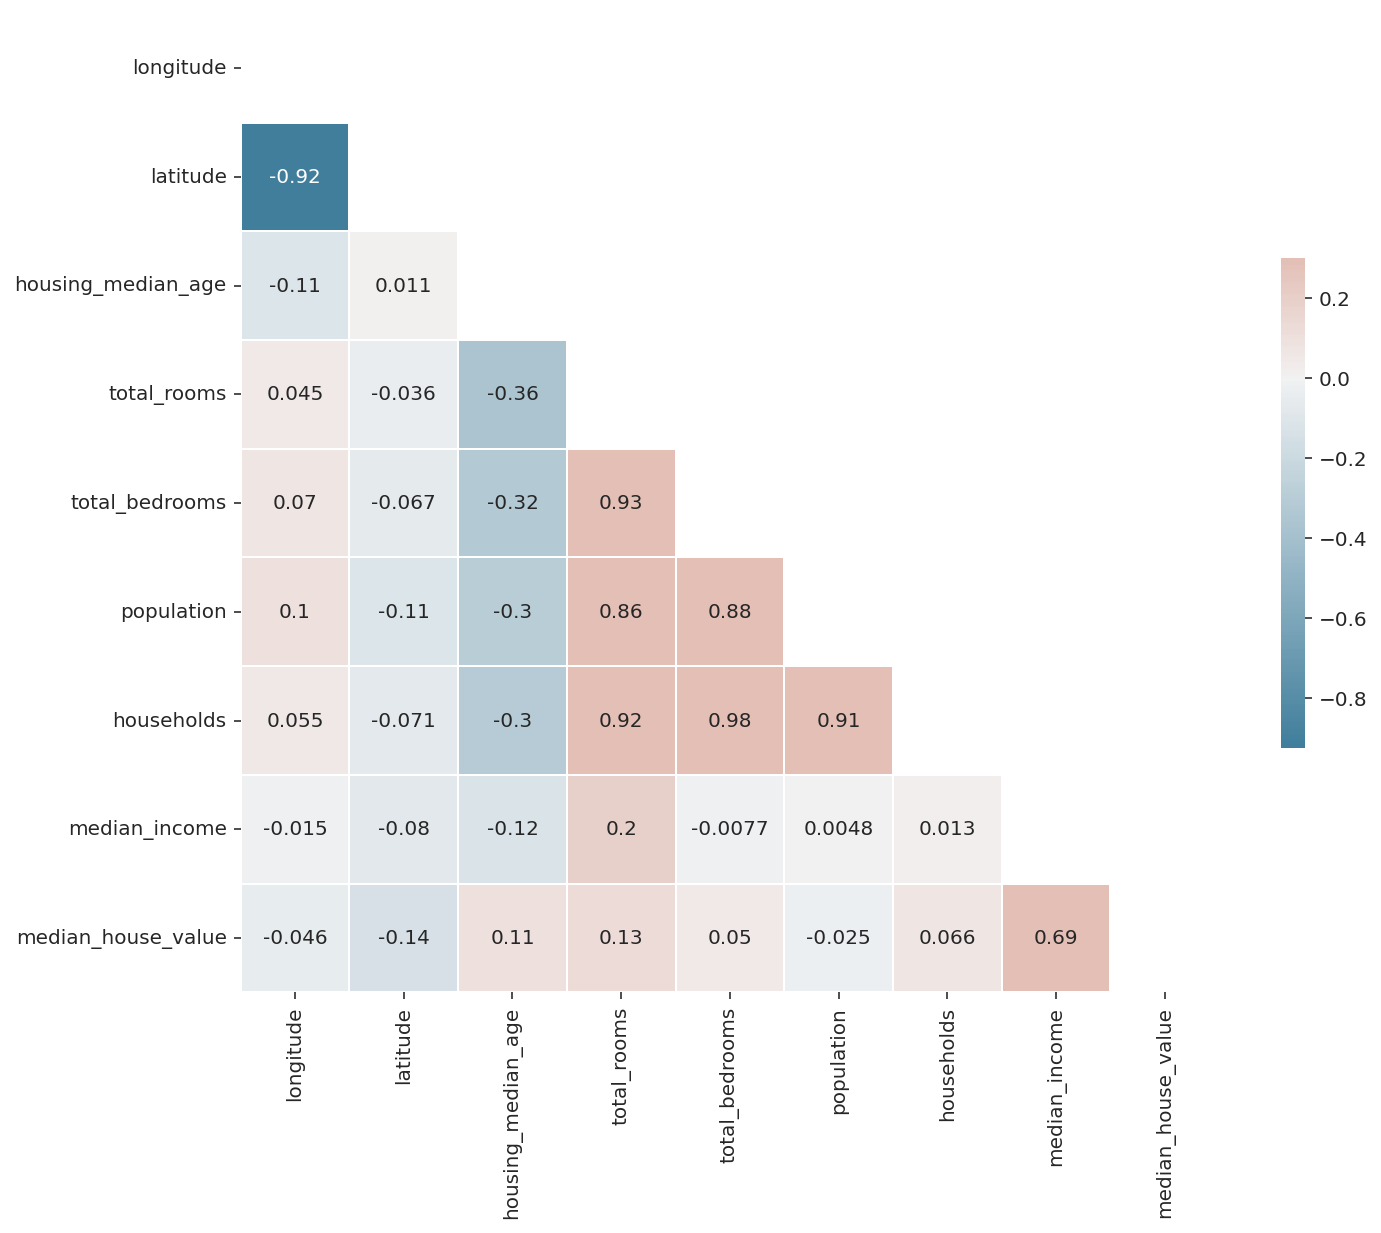

In [ ]:
# Obtenemos la matriz de correlaciones
corr = housingCA.corr()
# Generamos un artificio para hacer ceros por encima de la diagonal
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configuración del gráfico
f, ax = plt.subplots(figsize=(11, 9))
# Paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# gráfico de intensidad
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

El mayor grado de asociación se aprecia con la variable `median_income` (0.69), indicando que el valor de la vivienda está muy relacionado con el sueldo medio. No parece que ninguna de las otras variables tenga un peso relvante (ni positivo ni negativo) sobre la respuesta. Vemos el correspondiente gráfico de dispersión:

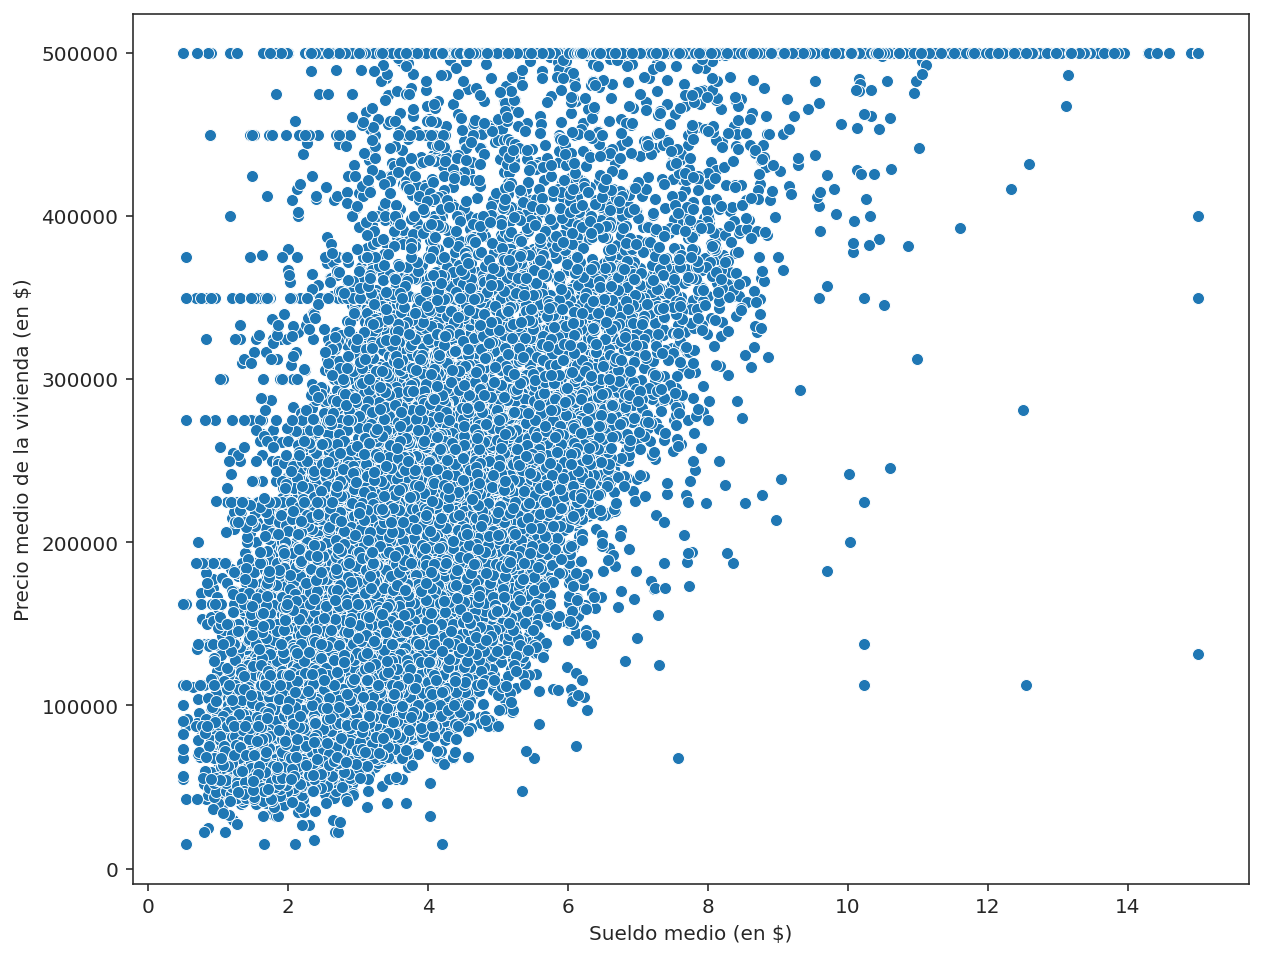

In [ ]:
# Representamos gráficamente la nube de puntos obtenida
f, ax = plt.subplots(figsize=(10, 8))  
sns.scatterplot(x='median_income', y='median_house_value', data = housingCA)
ax.set(xlabel='Sueldo medio (en $)', ylabel='Precio medio de la vivienda (en $)');

Podemos utilizar ahora las variables geográficas (aunque no las utilizaremos por el momento en el modelo) para valorar como cambian los precios de las viviendas en función de la localización que ocupan. Utilizamos la discretización automática que utiliza `seaborn` para representar los datos, así como una paleta de colores que nos permita visualizar claramente los precios más altos:

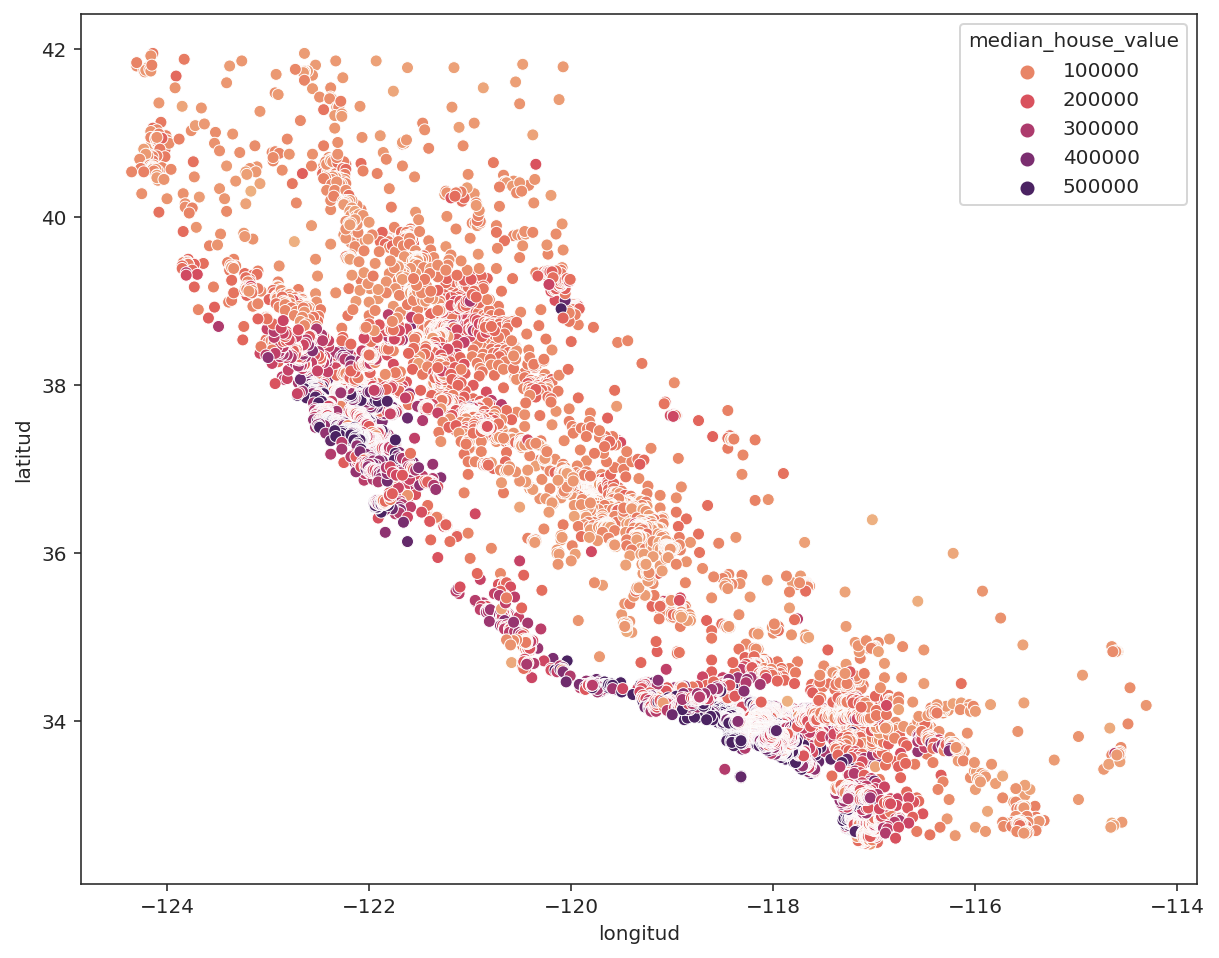

In [ ]:
# Gráfico del precio medio de la vivienda en función de latitud y longitud
f, ax = plt.subplots(figsize=(10, 8))  
sns.scatterplot(data = housingCA, x='longitude', y='latitude', hue='median_house_value', palette = 'flare')
ax.set(xlabel='longitud', ylabel = 'latitud');

Se aprecia como los precios más altos son los que corresponden con la viviendas situadas más próximas al océano. Estudiamos ahora el precio de las viviendas con respecto a la variable categórica que indica su situación geográfica. Comenzamos con el análisis descriptivo numérico:

In [ ]:
# Tabla descriptiva
tabla = pd.pivot_table(housingCA, 
               values = ['median_house_value'], 
               index = ['ocean_proximity'],
               aggfunc = {'describe'})
tabla.T

ocean_proximity                        <1H OCEAN         INLAND  \
median_house_value describe 25%    164100.000000   77500.000000   
                            50%    214850.000000  108500.000000   
                            75%    289100.000000  148950.000000   
                            count    9136.000000    6551.000000   
                            max    500001.000000  500001.000000   
                            mean   240084.285464  124805.392001   
                            min     17500.000000   14999.000000   
                            std    106124.292213   70007.908494   

ocean_proximity                           ISLAND       NEAR BAY     NEAR OCEAN  
median_house_value describe 25%    300000.000000  162500.000000  150000.000000  
                            50%    414700.000000  233800.000000  229450.000000  
                            75%    450000.000000  345700.000000  322750.000000  
                            count       5.000000    2290.000000    2658.000000  
                            max    450000.000000  500001.000000  500001.000000  
                            mean   380440.000000  259212.311790  249433.977427  
                            min    287500.000000   22500.000000   22500.000000  
                            std     80559.561816  122818.537064  122477.145927

Los precios y variabilidades más altos se corresponden con las viviendas más próximas al mar (bahía u océano), mientras que las viviendas con precios más bajos (y variabilidad más pequeña) son las que se encuentran en el interior. Representamos gráficamente la información anterior.

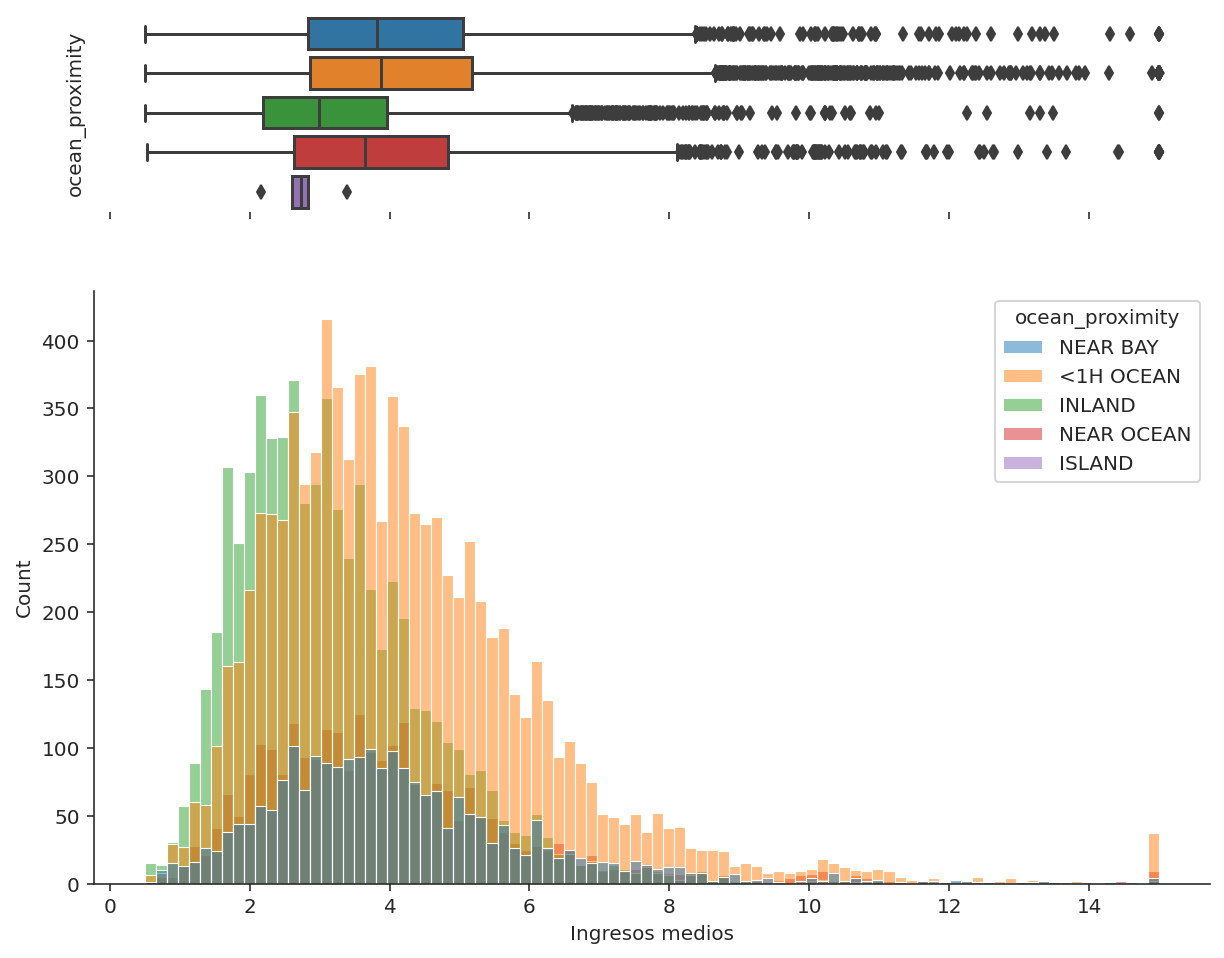

In [ ]:
# Creamos una figura conjunta con un gráfico de cajas y un histograma (ax_box and ax_hist)
f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(10, 8))  
# Asignamos un gráfico a cada ax
sns.boxplot(x = "median_income", y = "ocean_proximity" , data = housingCA, ax=ax[0])
sns.despine(left=True, bottom=True, ax=ax[0])
sns.histplot(housingCA, x="median_income", hue = "ocean_proximity", ax=ax[1])
sns.despine(right=True, top=True, ax = ax[1])
# Eliminamos el nombre del eje x para el boxplot
ax[0].set(xlabel='', yticks =[])
ax[1].set(xlabel = 'Ingresos medios')
plt.show()

Por último, representamos la información geográfica junto con la localización para verificar la situación de las viviendas con precios más altos

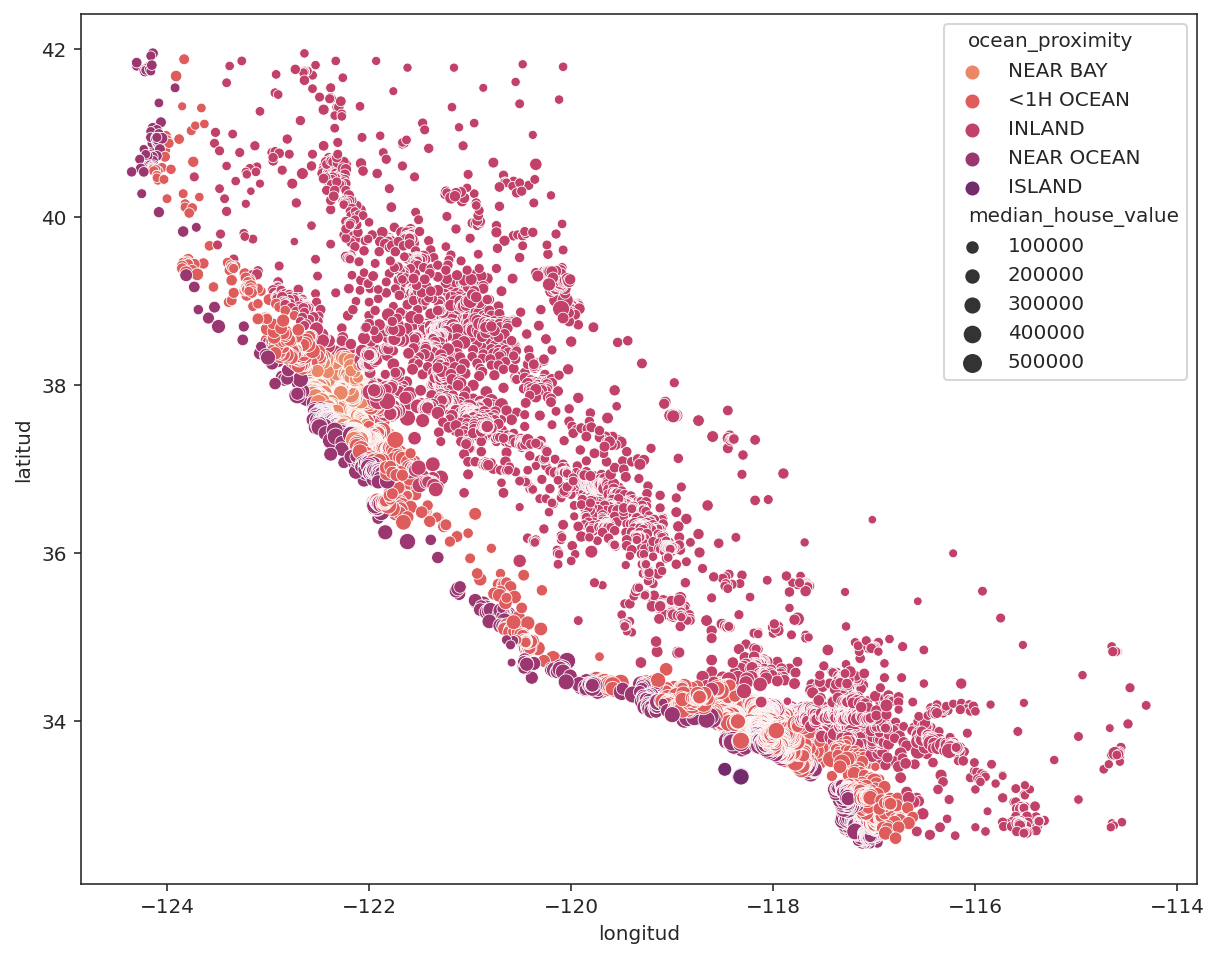

In [ ]:
# Gráfico del precio medio de la vivienda en función de latitud y longitud
f, ax = plt.subplots(figsize=(10, 8))  
sns.scatterplot(data = housingCA, x='longitude', y='latitude', hue='ocean_proximity',  
                size='median_house_value', palette = 'flare') 
ax.set(xlabel='longitud', ylabel = 'latitud');

# <font color="steelblue">Nuestros primeros modelos</font>




En todos los ejemplos que vamos a resolver a continuación vamos a ajustar el modelo de regresión lineal y analizar su capacidad explicativa. Además, en los tres primeros vamos a observar gráficamente cómo se ajusta la recta de regresión a las nubes de puntos. En estos tres utilizaremos todo el conjunto de datos para obtener el modelo, mientras que en los otros dos utilizaremos los datos de entrenamiento para el ajuste y los datos de validación para el análisis de la capacidad explicativa.

Por último, representaremos los residuos obtenidos versus los valores predichos para analizar gráficamente la solución obtenida.

## <font color="steelblue">Ejemplo 1.1</font>

### Entrenamiento del modelo

Comenzamos obtendiendo el modelo lineal correspondiente a los datos de ejempo 1.1. 

In [ ]:
# Definimos el tipo de modelo
lr = LinearRegression()
# Cargamos respuesta y predictora
x11 = datos1['x11'].values.reshape(-1,1)
y11= datos1['y11'].values.reshape(-1,1)
# Ajuste del modelo
lr.fit(x11, y11)
# Predicción del modelo
pred_y11 = lr.predict(x11)
# Coeficientes w estimados
pendiente =  np.round(lr.coef_[0],2)
sesgo = np.round(lr.intercept_,2)
print(f'Sesgo: {sesgo}\nPendiente = {pendiente}')

Sesgo: [1.13]
Pendiente = [0.48]


la ecuación del modelo lineal obtenido es entonces:

$$y = 1.13 + 0.48 · X, $$

que se caracteriza por tener un valor de corte al eje *y* (sesgo) de 1.13 y una pendiente positiva con valor 0.48, es decir, el promedio de la respuesta sin la presencia de la predictora es de 1.13, mientras que el valor de la respuesta aumenta en 0.48 unidades por cada unidad que aumenta el valor de la predictora. El resultado es prácticamente idéntico al modelo teórico de partida donde el sesgo era 1 y la pendiente 0.5. La poca variabildiad del error nos lleva a ser muy precisos en la obtención de los parámetros del modelo.

### Predicción y capacidad explicativa

Representamos gráficamente el modelo de predicción obtenido y estudiamos la capacidad explicativa de este modelo.

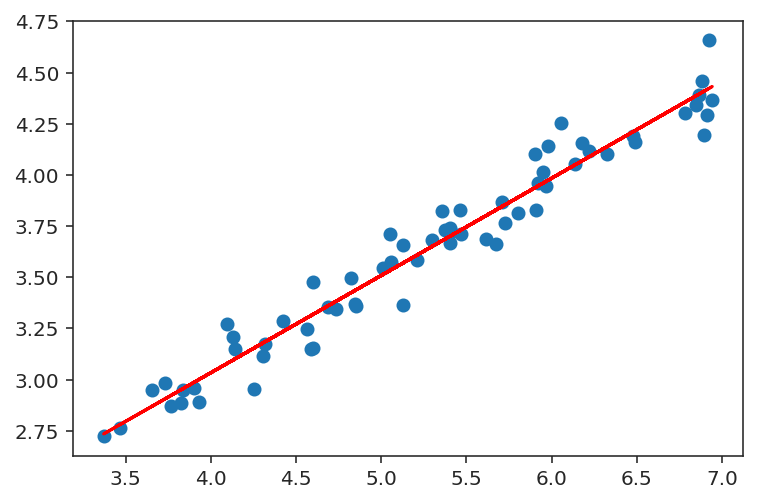

In [ ]:
# Nube de puntos original
plt.scatter(x11, y11) 
# Modelo predicho
plt.plot(x11, pred_y11, color ='r')   
plt.show() 

Podemos ver que el modelo de predicción (línea roja) captura muy bien el comportamiento de la nube de puntos, lo que indica que la predictora nos porporciona suficiente información para predecir el comportamiento de la respuesta. Analizamos ahora la capacidad explicativa del modelo mediante las medidas presentadas en puntos anteriores. 



In [ ]:
# Importamos módulos necesarios
from sklearn.metrics import r2_score
from sklearn.feature_selection import f_regression, mutual_info_regression

Analizamos el valor de $R^2$:

In [ ]:
print('R^2 = %.3f' % (r2_score(y11, pred_y11)))

R^2 = 0.955


El valor de $R^2$ obtenido indica que el 95'5% de la variabilidad total de la respuesta es explicada por el modelo obtenido, es decir, que la variable predictora tiene mucha capacidad para indicar el comportamiento de la respuesta. Si tenemos un nuevo valor de la predictora podemos utilizar el modelo obtenido para dar una valor de la respuesta con una precisión muy alta. 

Con respecto al test $F$ tenemos que: 


In [ ]:
f_test, pvalor = f_regression(x11, y11.flatten())
print('El valor del test F es: %.2f'%f_test)
print('El valor del p_valor es: %.6f'%pvalor)

El valor del test F es: 1350.15
El valor del p_valor es: 0.000000


El test F resulta signiticativo (p-valor $<0.05$) indicando que hay evidencias estadísticas para conlcuir que la pendiente del modelo es distinta de cero, es decir, que repuesta y predictora están relacionadas. A la vista, del modelo de predicción obtenido podemos conluir que dicha relación es de tipo lineal. Además, la información mútua también proporciona un valor alto. En este caso, este hecho refleja únicamente asociación entre ambas variables.

In [ ]:
mi = mutual_info_regression(x11, y11.flatten())
print('El valor de la regresión de información mutua es: %.2f'%mi)

El valor de la regresión de información mutua es: 1.50


Obtenemos ahora los valores de MSE y RMSE para este conjunto de datos:

In [ ]:
from sklearn.metrics import mean_squared_error

mse11 = mean_squared_error(x11, pred_y11)
rmse11 = np.sqrt(mse11)
print('El valor del MSE es: %.2f'%mse11)
print('El valor del RMSE es: %.2f'%rmse11)

El valor del MSE es: 2.93
El valor del RMSE es: 1.71


Por lo que tenemos un error cuadrático promedio en las predicciones de 2.93.

### Residuos

Por último, realizamos un gráfico de los residuos del modelo de los valores predichos. La línea roja indica el valor promedio de los residuos. Para que el modelo obtenido sea adecuado los residuos deben ser lo más pequeños posibles y repartirse aleatoriamente a lo largo de los valores predichos, para asegurar que el error cometido es constante independientemente del valor predicho. 

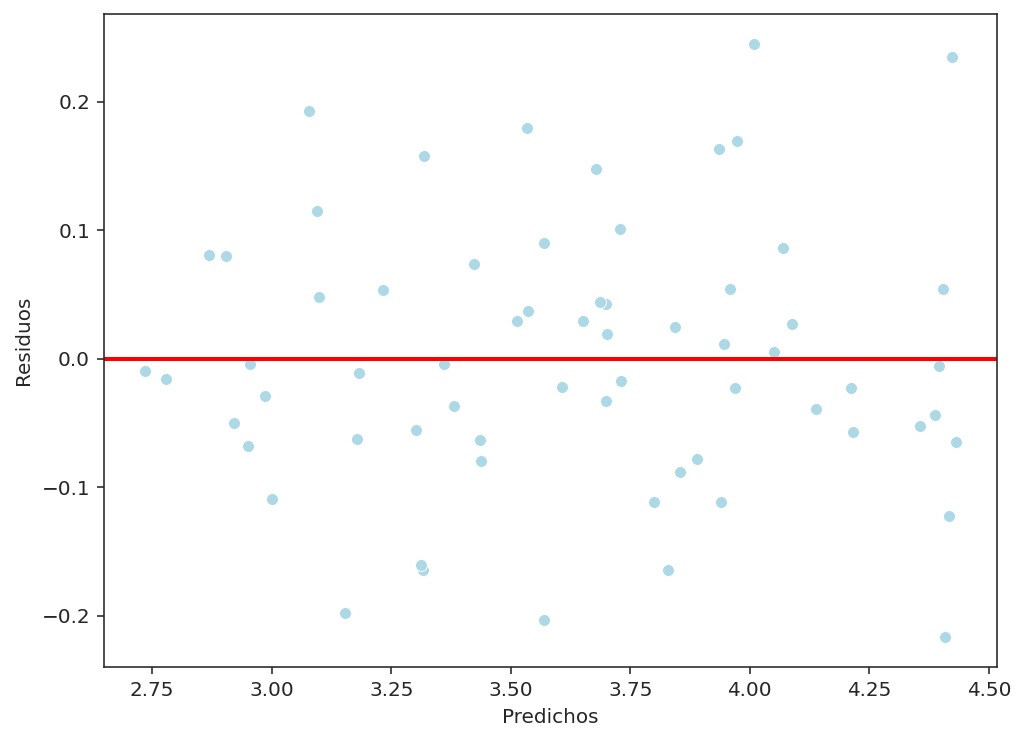

In [ ]:
# Obtenemos los residuos
residuos11 = y11-pred_y11
d = pd.DataFrame(np.concatenate((pred_y11,residuos11), axis=1), columns=['predichos', 'residuos'])
# Representación gráfica
f, ax = plt.subplots(figsize=(8, 6))  
sns.scatterplot(data = d, x='predichos', y='residuos', color = "lightblue") 
ax.axhline(0, color = "red", lw = 2)
ax.set(xlabel='Predichos', ylabel = 'Residuos');


## <font color="steelblue">Ejemplo 1.2</font>

### Entrenamiento del modelo

Comenzamos con el ejemplo 1.2 que, aunque parte del mismo modelo teórico que en el ejemplo anterior, la variabilidad del error es tres veces la de este. Lo que decimos es que la variablidad de la respuesta es muy superior a la de la predictora, de forma que nos resultará muy difícil explicar la respuesta con la predictora considerada. Comenzamos obteniendo el modelo y la predicción correspondiente.

In [ ]:
# Cargamos respuesta y predictora
x12 = datos2['x12'].values.reshape(-1,1)
y12 = datos2['y12'].values.reshape(-1,1)
# Ajuste del modelo
lr.fit(x12, y12)
# Predicción del modelo
pred_y12 = lr.predict(x12)
# Coeficientes w estimados
pendiente =  np.round(lr.coef_[0],2)
sesgo = np.round(lr.intercept_,2)
print(f'Sesgo: {sesgo}\nPendiente = {pendiente}')

Sesgo: [3.]
Pendiente = [0.13]


El modelo resultante es:

$$y = 3 + 0.13 · X $$

Este se caracteriza por tener un promedio de la respuesta sin la presencia de la predictora de 3, y un aumento del valor de la respuesta en 0.13 unidades por cada unidad que aumenta el valor de la predictora. Podemos ver además que el modelo obtenido no refleja el modelo teórico de partida $y = 1 + 0.5*X$. 

### Predicción y capacidad explicativa

De hecho, podemos ver en la figura siguiente la solución obtenida donde se aprecia que la pendiente es casi constante indicando poca asociación entre respuesta y predictora. 

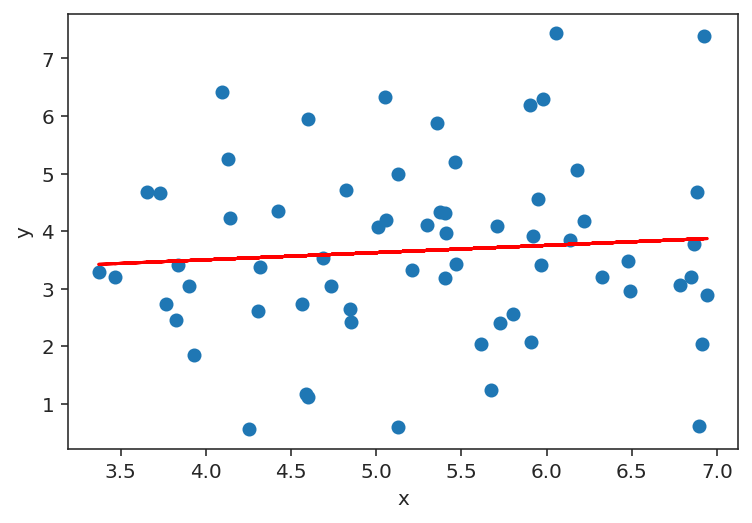

In [ ]:
# Nube de puntos original
plt.scatter(x12, y12) 
plt.xlabel('x')
plt.ylabel('y')
# Modelo predicho 
plt.plot(x12, pred_y12, color ='r') 
plt.show()

Este hecho se verifica además en el cálculo del $R^2$ cuyo valor es 0.007, lo que implica que el 0.7% de la variabilidad de la respuesta se puede explicar por la predictora. En este caso la variable predictora tiene poca capacidad para indicar el comportamiento de la respuesta. Se puede ver como un valor  mayor de la variabilidad del error nos lleva a obtener un modelo erróneo a pesar de que tenemos el modelo teórico de partida. En una situación real este problema puede resultar muy grave ya que desconocemos el modelo teórico de partida. 

In [ ]:
print('R^2 = %.3f' % (r2_score(y12, pred_y12)))

R^2 = 0.007


Analizamos ahora el valor del test F.

In [ ]:
f_test, pvalor = f_regression(x12, y12.flatten())
print('El valor del test F es: %.2f'%f_test)
print('El valor del p_valor es: %.6f'%pvalor)


El valor del test F es: 0.42
El valor del p_valor es: 0.521063


Dado que el p-valor obtenido es superior a 0.05 podemos concluir que el coeficiente asociado con la predictora podría ser cero, de forma que, no existe relación entre predictora y respuesta. De nuevo llegamos a una conclusión errónea debido a la alta variabilidad. Algo similar nos ocurre cuando usamos la información mútua.

In [ ]:
mi = mutual_info_regression(x12, y12.flatten())
print('El valor de la regresión de información mutua es: %.4f'%mi)

El valor de la regresión de información mutua es: 0.0000


Calculamos MSE y RMSE:

In [ ]:
mse12 = mean_squared_error(x12, pred_y12)
rmse12 = np.sqrt(mse12)
print('El valor del MSE es: %.2f'%mse12)
print('El valor del RMSE es: %.2f'%rmse12)

El valor del MSE es: 3.34
El valor del RMSE es: 1.83


Como podemos observar, el MSE ha aumentado con respecto al ejemplo 1.1, a pesar de que el modelo teórico de partida es el mismo. Esto se debe a la mayor variabilidad del error e  indica que obtendremos peores predicciones que con el ejemplo anterior.

### Residuos

Representamos ahora los residuos obtenidos:

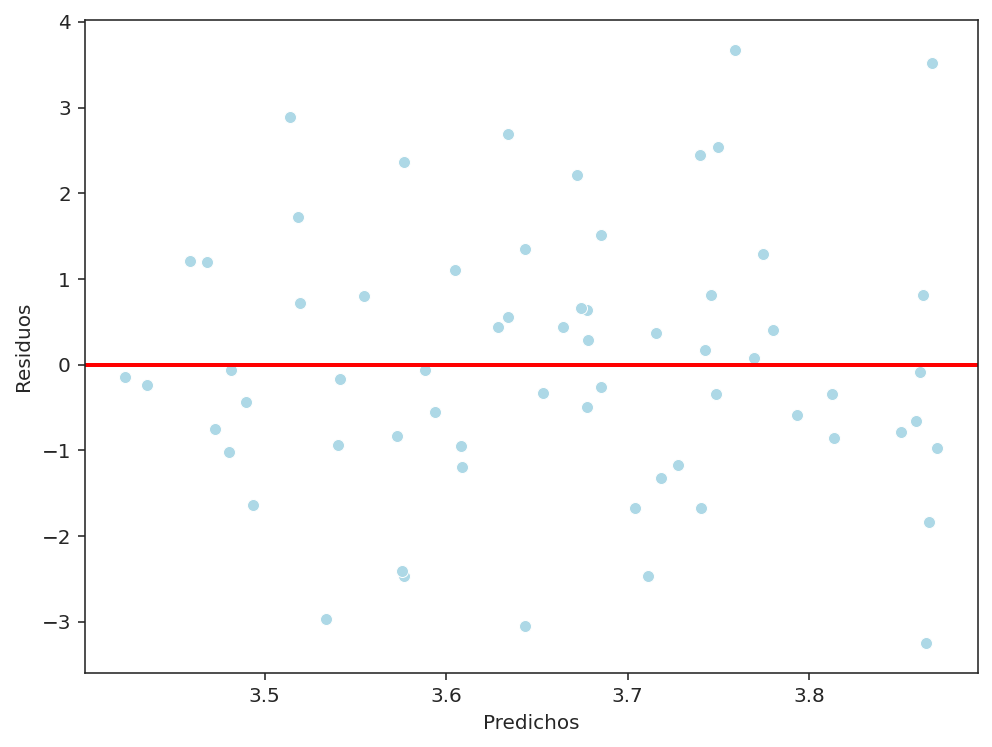

In [ ]:
# Obtenemos los residuos
residuos12 = y12-pred_y12
d = pd.DataFrame(np.concatenate((pred_y12,residuos12), axis=1), columns=['predichos', 'residuos'])
# Representación gráfica
f, ax = plt.subplots(figsize=(8, 6))  
sns.scatterplot(data = d, x='predichos', y='residuos', color = "lightblue") 
ax.axhline(0, color = "red", lw = 2)
ax.set(xlabel='Predichos', ylabel = 'Residuos');

Aunque el gráfico de los residuos es similar al del ejemplo 1.1, se puede ver en el eje y como la variabilidad es muy superior, o que reduce la capacidad de predicción del modelo considerado. 

## <font color="steelblue">Ejemplo 1.3</font>

### Entrenamiento del modelo

En este caso tenemos un modelo teórico que no es una recta y por tanto esperamos que nuestro modelo lineal proporcione malos resultados. Sólo esperamos que el criterio de información mutua nos de un valor indicando que hay asociación entre predictora y respuesta aunque esta no sea mediante la ecuación de una recta.

In [ ]:
# Cargamos respuesta y predictora
x13 = datos3['x13'].values.reshape(-1,1)
y13 = datos3['y13'].values.reshape(-1,1)
# Ajuste del modelo
lr.fit(x13, y13)
# Predicción del modelo
pred_y13 = lr.predict(x13)
# Coeficientes w estimados
pendiente =  np.round(lr.coef_,2)
sesgo = np.round(lr.intercept_,2)
#print(f'El modelo resultante es:  y = {corte} + {pendiente}·X')
print(f'Sesgo: {sesgo}\nPendiente = {pendiente}')

Sesgo: [0.37]
Pendiente = [[-0.02]]


El modelo resultante es:

$$y = 0.37 - 0.02 · X $$

Se caracteriza por tener un valor de corte al eje *y* (intercept) de 0.37 y una pendiente negativa con valor 0.02, es decir, el promedio de la respuesta sin la presencia de la predictora es de 0.37, mientras que el valor de la respuesta disminuye en 0.02 unidades por cada unidad que aumenta el valor de la predictora. 

### Predicción y capacidad explicativa

Podemos visualizar el modelo obtenido en la figura siguiente:

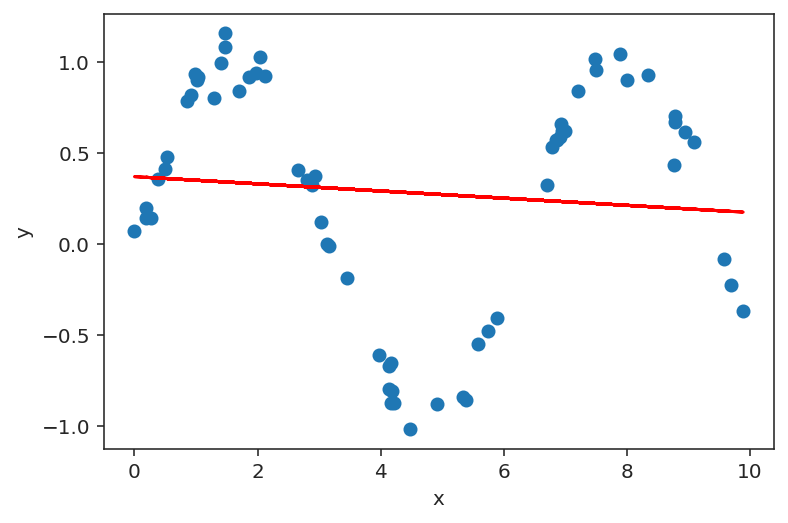

In [ ]:
# Nube de puntos original
plt.scatter(x13, y13)
plt.xlabel('x')
plt.ylabel('y') 
# Modelo predicho
plt.plot(x13, pred_y13, color ='r') 
plt.show()

Claramente el modelo de predicción obtenido no representa el comportamiento observado entre respuesta y predictora, lo que nos llevará a un modelo con poca capacidad predictiva. De hecho podemos obtener el $R^2$ asociado a este modelo:

In [ ]:
print('R^2 = %.3f' % (r2_score(y13, pred_y13)))

R^2 = 0.008


donde podemos ver que el 0.8% de la variabilidad de la respuesta es explicada por la variable predictora. Este comportamiento es esperable poque el modelo considerado no tiene en cuenta los cambios de tendencia y curvaturas observadas en la nube de puntos original. Hemos optado por un modelo muy básico que podríamos utilizar como modelo de base para establecer diferentes mejoras.

In [ ]:
f_test, pvalor = f_regression(x13, y13.flatten())
print('El valor del test F es: %.2f'%f_test)
print('El valor del p_valor es: %.6f'%pvalor)

El valor del test F es: 0.53
El valor del p_valor es: 0.468098


De nuevo el p-valor asociado no resulta significativo indicando que el modelo tiene poca capacidad predictiva. Podemos ver que la información mutua si resulta relevante indicando que hay asociación aunque esta no sea mediante una recta.

In [ ]:
mi = mutual_info_regression(x13, y13.flatten())
print('El valor de la regresión de información mutua es: %.2f'%mi)

El valor de la regresión de información mutua es: 1.02


Calculamos el MSE y RMSE:

In [ ]:
mse13 = mean_squared_error(x13, pred_y13)
rmse13 = np.sqrt(mse13)
print('El valor del MSE es: %.2f'%mse13)
print('El valor del RMSE es: %.2f'%rmse13)

El valor del MSE es: 26.25
El valor del RMSE es: 5.12


El MSE es mucho mayor que en los ejemplos anteriores, dado que el modelo obtenido está muy alejado del verdadero comportamiento de los datos. Es evidente que en esta situación obtendremos muy malas predicciones.

### Residuos

Realizamos ahora el gráfico de residuos correspondiente:

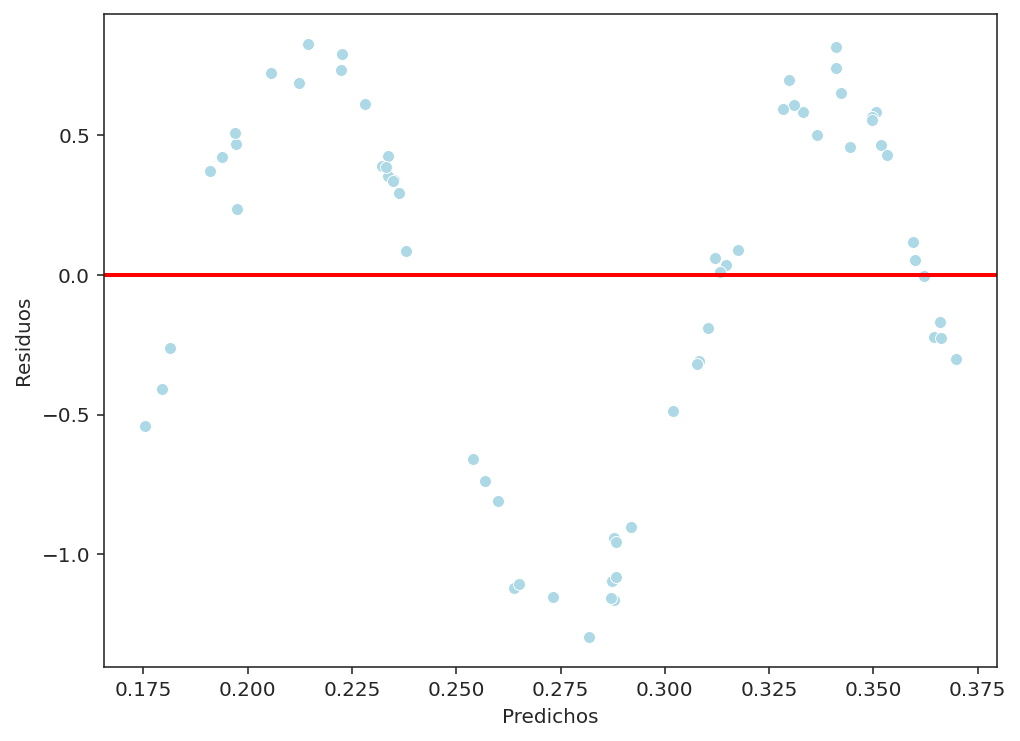

In [ ]:
# Obtenemos los residuos
residuos13 = y13-pred_y13
d = pd.DataFrame(np.concatenate((pred_y13,residuos13), axis=1), columns=['predichos', 'residuos'])
# Representación gráfica
f, ax = plt.subplots(figsize=(8, 6))  
sns.scatterplot(data = d, x='predichos', y='residuos', color = "lightblue") 
ax.axhline(0, color = "red", lw = 2)
ax.set(xlabel='Predichos', ylabel = 'Residuos');

Se aprecia claramente una tendencia en los residuos similar a la del gráfico de dispersión original, indicando que el modelo planteado no es capaz de representar las tendencias observadas. 

Una vez estudiados los conjuntos de datos simulados pasamos al análisis de los bancos de datos reales donde utilizaremos la muestra de entrenamiento para la obtención del modelo y la muestra de validación para analizar la capacidad explicativa del modelo.

## <font color="steelblue">Housing</font>

### Entrenamiento del modelo

En el análisis de estos bancos de datos utilizaremos las variables estandarizadas para determinar el peso real de cada predictora sobre la respuesta. Utilizamos el 80% de los datos para entrenamiento y el 20% restante para validación.

En primer lugar entrenamos el modelo:

In [ ]:
# Planteamos el modelo
lr = LinearRegression()
# Entrenamos el modelo
lr.fit(X2_train, y2_train)
# Obtenemos los pesos o coeficientes del modelo
np.round(lr.intercept_,3)

3.292

In [ ]:
# Matriz de pesos
pd.DataFrame(np.round(lr.coef_,3), index = X2_train.columns, columns =["pesos"]).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
pesos,-0.106,0.076,0.03,0.077,-0.217,0.339,-0.019,-0.331,0.248,-0.195,-0.215,0.123,-0.395


El modelo resultante tiene por ecuación (teniendo en cuenta que las variables están estandarizadas):

$$\widehat{MEDV} = 3.292 -0.106CRIM+0.076ZN+0.03INDUS+0.077CHAS-0.217NOX+0.339RM-0.019AGE-0.331DIS+0.248RAD-0.195TAX-0.215PTRATIO+0.123B-0.395LSTAT$$

donde podemos observar que las variables (por orden de importancia) que hacen crecer más el precio promedio se corresponden con `RM` número de cuartos promedio y `RAD` o índice de accesibilidad a carreteras radiales. Por otro lado, las variables que hacen disminuir más el precio son `LSTAT` o porcentaje de la población del nivel más bajo, `NOX` o concentración de ácidos nítricos, y `PTRATIO` o ratio de alumnos por profesor. Esta configuración parece distinguir las zonas más desarrolaldas de las menos desarrolladas. Los pesos se corresponden con el análisis descriptivo realizado anteriormente.

### Predicción y capacidad explicativa

Obtenemos ahora los valores de $R^2$ tanto para la muestra de entrenamiento como para la muestra de validación a partir de los valores predichos por el modelo para cada uno de los conjuntos. Obtenemos los valores predichos:

In [ ]:
# Valores de predicción
y2_train_pred = lr.predict(X2_train)
y2_test_pred = lr.predict(X2_test)
# valores de R2
print('R^2 entrenamiento: %.3f, validación: %.3f' % (
        r2_score(y2_train, y2_train_pred),
        r2_score(y2_test, y2_test_pred)))

R^2 entrenamiento: 0.751, validación: 0.669


En este caso, indica que el modelo explica el 75.1% de la variabilidad de la respuesta para la muestra de entrenamiento, y el 66.9% para la muestra de validación. Teniendo en cuenta que en el entrenamiento tenemos un 80% de los datos y en la validación tan solo un 20%, la diferencia en el $R^2$ de aproximadamente un 5% es bastante aceptable.

Obtenemos ahora los valores del test F y la información mutua para evaluar la capacidad explicativa de cada variable. En este caso normalizaremos los datos obtenidos para clasificar las variables más relevantes.

In [ ]:
# F test
f_test, pvalor = f_regression(X2_train, y2_train)
f_test /= np.max(f_test)
fdf = pd.DataFrame(f_test)
# Información mutua
mi = mutual_info_regression(X2_train, y2_train)
mi /= np.max(mi)
midf = pd.DataFrame(mi)
pd.DataFrame(np.concatenate((fdf,midf),axis=1),index = X2_train.columns,columns=['%F test','%MI']).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
%F test,0.142511,0.089407,0.239998,0.031829,0.176374,0.861212,0.110470,0.049381,0.149083,0.226249,0.268390,0.110251,1.0
%MI,0.511934,0.275075,0.704480,0.033394,0.645540,0.759695,0.439957,0.382223,0.320478,0.485543,0.702457,0.275577,1.0


Las variables más relevantes con el test F se corresponden con `LSTAT` (1.0) y `RM` (0.861), mientras que con MI tenemos `INDUS`, `NOX`, `RM`, `PTRATIO`, y `LSTAT`. Este resultado indica que hay variables que no se relacionan mediante una recta pero si que tienen una alta asociación con la respuesta. Dichas variables son `INDUS`, `NOX`, y `PTRATIO`. Esto se debe tener en cuenta para mejorar la capacidad predictiva del modelo.

Calculamos el MSE y el RMSE tanto para la muestra de entrenamiento como de validación para valorar la estabildiad del modelo construido:

In [ ]:
# entrenamiento
train_mse2 = np.round(mean_squared_error(y2_train,y2_train_pred),3)
train_rmse2 = np.round(np.sqrt(train_mse2),3)
# validación
test_mse2 = np.round(mean_squared_error(y2_test,y2_test_pred),3)
test_rmse2 = np.round(np.sqrt(test_mse2),3)
# tabla de resultados
met2 = [[train_mse2,train_rmse2],
        [test_mse2,test_rmse2]]
df2 = pd.DataFrame(met2, columns = ['MSE','RMSE'], index =['Entrenamiento','Validación'])
df2

,MSE,RMSE
Entrenamiento,0.256,0.506
Validación,0.288,0.537


### Residuos

Por último representamos los residuos del modelo frente a los valores predichos para valorar su comportamiento. En este caso representamos en colores distintos los residuos para la muestra de entrenamiento y validación para verificar si se ha producido algún tipo de sesgo en la selección de la muestra de entrenamiento. 

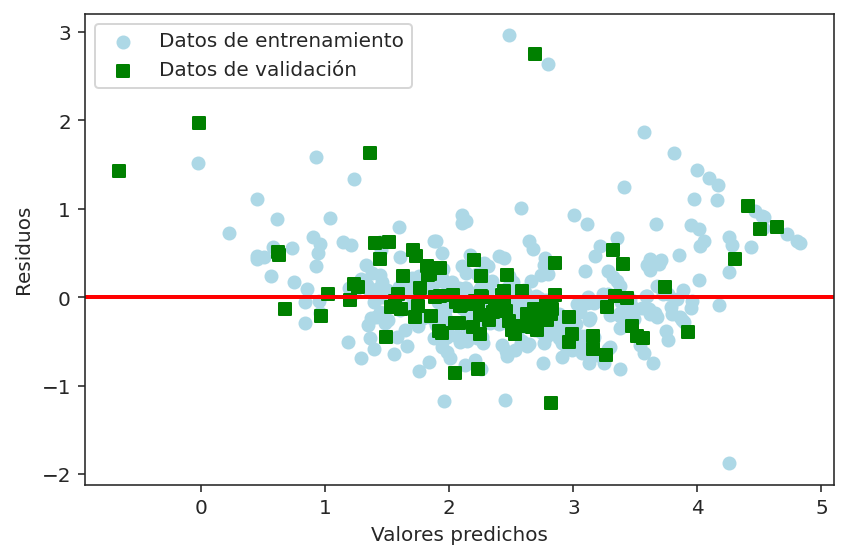

In [ ]:
# Gráfico de residuos frente a valores predichos
plt.scatter(y2_train_pred,  y2_train - y2_train_pred, c='lightblue', marker='o', label='Datos de entrenamiento')
plt.scatter(y2_test_pred,  y2_test - y2_test_pred, c='green', marker='s', label='Datos de validación')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.legend(loc='upper left')
plt.axhline(y=0, lw=2, color='red')
plt.tight_layout()

plt.show()

Observamos de manera gráfica que los datos de validación se ajustan bastante bien a los datos de entrenamiento, como habíamos comentado anteriormente.

## <font color="steelblue">HousingCA</font>

### Entrenamiento del modelo

Utilizamos le 80% de los datos para el entrenamiento y el 20% restante para la validación, y entrenamos el modelo utilizando las variables estadarizadas y la codificación de la variable categórica.

En primer lugar entrenamos el modelo:

In [ ]:
# Planteamos el modelo
lr = LinearRegression()
# Entrenamos el modelo
lr.fit(X3_train, y3_train)
# Obtenemos los pesos o coeficientes del modelo
np.round(lr.intercept_,3)

0.17

In [ ]:
# Matriz de pesos
pd.DataFrame(np.round(lr.coef_,3), index = X3_train.columns, columns =["pesos"])

,pesos
housing_median_age,0.132
total_rooms,-0.139
total_bedrooms,0.300
population,-0.366
households,0.255
median_income,0.669
ocean_proximity_INLAND,-0.595
ocean_proximity_ISLAND,1.368
ocean_proximity_NEAR BAY,0.028
ocean_proximity_NEAR OCEAN,0.108


El modelo resultante se puede expresar mediante los pesos obtenidos teniendo en cuenta las correspondientes variables codificadas, de forma que obtenemos cinco ecuaciones diferentes (una por cada variable codificada) para explicar el comportamiento de la respuesta (`median_house_value = MHV`)

$$\widehat{MHV}_{<1H OCEAN} = 0.17 + 0.132 (housing-median-age)-0.139(total-rooms) + 0.300 (total-bedrooms) - 0.366(population) +0.255(households)+0.669(median-income)$$

$$\widehat{MHV}_{INLAND} = 0.17 + 0.132 (housing-median-age)-0.139(total_rooms) + 0.300 (total-bedrooms) - 0.366(population) +0.255(households)+0.669(median-income) - 0.595$$

$$\widehat{MHV}_{ISLAND} = 0.17 + 0.132 (housing-median-age)-0.139(total-rooms) + 0.300 (total-bedrooms) - 0.366(population) +0.255(households)+0.669(median-income) + 1.368$$

$$\widehat{MHV}_{NEAR BAY} = 0.17 + 0.132 (housing-median-age)-0.139(total-rooms) + 0.300 (total-bedrooms) - 0.366(population) +0.255(households)+0.669(median-income) + 0.028$$

$$\widehat{MHV}_{NEAR OCEAN} = 0.17 + 0.132 (housing-median-age)-0.139(total-rooms) + 0.300 (total-bedrooms) - 0.366(population) +0.255(households)+0.669(median-income) + 0.108$$

Como era de esperar los modelos para todas las localizaciones tienen en común los pesos de las variables numéricas destacando que el precio medio se ve más afectado por el sueldo medio (a mayor sueldo medio mayor valor de la vivienda), y por la población (a mayor población menor precio de la vivienda). Las localizaciones sólo incerementan o disminuyen el valor de referencia dado por el sesgo para las viviendas.
Como era de esperar los modelos para todas las localizaciones tienen en común los pesos de las variables numéricas destacando que el precio medio se ve más afectado por el sueldo medio (a mayor sueldo medio mayor valor de la vivienda), y por la población (a mayor población menor precio de la vivienda). Las localizaciones sólo incerementan o disminuyen el valor de referencia dado por el sesgo para las viviendas codificadas como `<1H OCEAN`, donde las viviendas con un mayor incremento son las codificadas como `ISLAND` (1.368), y las codificadas como `INLAND` tienen un precio que disminuye en 0.595. 

### Predicción y capacidad explicativa

Obtenemos ahora los valores de $R^2$ tanto para la muestra de entrenamiento como para la muestra de validación a partir de los valores predichos por el modelo para cada uno de los conjuntos. Obtenemos los valores predichos:

In [ ]:
# Valores de predicción
y3_train_pred = lr.predict(X3_train)
y3_test_pred = lr.predict(X3_test)
# valores de R2
print('R^2 entrenamiento: %.3f, validación: %.3f' % (
        r2_score(y3_train, y3_train_pred),
        r2_score(y3_test, y3_test_pred)))

R^2 entrenamiento: 0.638, validación: 0.616


Ambos valores son prácticamente idénticos indicando que el modelo mantiene su capacidad explicatica tanto en el entrenamiento como en la validación. El valor obtenido del 63.8% indica que el modelo parece adecuado para explicar el comportamiento de la respuesta.

Obtenemos ahora los valores del test F y la información mutua para evaluar la capacidad explicativa de cada variable. En este caso normalizaremos los datos obtenidos para clasificar las variables más relevantes.

In [ ]:
# F test
f_test, pvalor = f_regression(X3_train, y3_train)
f_test /= np.max(f_test)
fdf = pd.DataFrame(f_test)
# Información mutua
mi = mutual_info_regression(X3_train, y3_train)
mi /= np.max(mi)
midf = pd.DataFrame(mi)
pd.DataFrame(np.concatenate((fdf,midf),axis=1),index = X3_train.columns,columns=['%F test','%MI']).T

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
%F test,0.011921,0.020045,0.002530,0.000744,0.004469,1.0,0.333376,0.000483,0.029601,0.020128
%MI,0.084130,0.113605,0.062629,0.069076,0.088458,1.0,0.520200,0.006986,0.048039,0.041757


Las variables más relevantes con el test F y con MI son `median_income` y `ocean_proximity_INLAND`. Esto indica que las variables tienen una alta relación con la respuesta.

Calculamos el MSE y RMSE correspondientes:

In [ ]:
# entrenamiento
train_mse3 = np.round(mean_squared_error(y3_train,y3_train_pred),3)
train_rmse3 = np.round(np.sqrt(train_mse3),3)
# validación
test_mse3 = np.round(mean_squared_error(y3_test,y3_test_pred),3)
test_rmse3 = np.round(np.sqrt(test_mse3),3)
# tabla de resultados
met3 = [[train_mse3,train_rmse3],
        [test_mse3,test_rmse3]]
df3 = pd.DataFrame(met3, columns = ['MSE','RMSE'], index =['Entrenamiento','Validación'])
df3

,MSE,RMSE
Entrenamiento,0.364,0.603
Validación,0.378,0.615


El conjunto de datos de validación tiene unas métricas muy similares al conjunto de entrenamiento, por lo que a penas se observan diferencias.

### Residuos

Por último representamos los residuos del modelo frente a los valores predichos para valorar su comportamiento. En este caso representamos en colores distintos los residuos para la muestra de entrenamiento y validación para verificar si se ha producido algún tipo de sesgo en la selección de la muestra de entrenamiento.

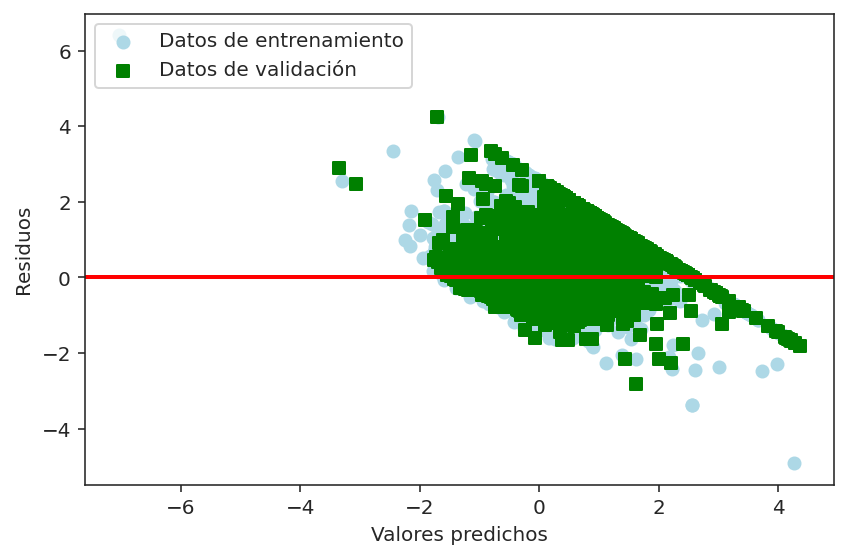

In [ ]:
# Gráfico de residuos frente a valores predichos
plt.scatter(y3_train_pred,  y3_train - y3_train_pred , c='lightblue', marker='o', label='Datos de entrenamiento')
plt.scatter(y3_test_pred,  y3_test - y3_test_pred, c='green', marker='s', label='Datos de validación')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.legend(loc='upper left')
plt.axhline(y=0, lw=2, color='red')
plt.tight_layout()

plt.show()

Como se puede apreciar en el gráfico hay cierta tendencia entre los valores predichos y los residuos que se debe principalmente a la estructura geográfica de los datos (la nube de puntos reproduce casi el mapa de localizaciones) que no ha sido incluida en el modelo. La inclusión de esa estructra geográfica se analiza desde el punto de vista de los modelos geoestadísticos que por el momento no son objeto de este cuaderno.

## Autoevaluación


<center><b>GRÁFICO 1</b></center>

<center><small><img src=https://raw.githubusercontent.com/ia4legos/MachineLearning/main/images/grafico1.png width="450" height="350"></small></center>

<center><b>GRÁFICO 2</b></center>

<center><small><img src=https://raw.githubusercontent.com/ia4legos/MachineLearning/main/images/grafico2.png width="450" height="350"></small></center>



In [ ]:
#@title <b><font color="steelblue"> Pregunta interactiva
display_quiz(json.loads(base64.b64decode(open("auto_50_3.json","rb").read()).decode('utf8')))

# <font color="steelblue">Estabilidad de la solución</font>

Estudiamos ahora la estabilidad de la solución obtenida, es decir, analizamos si  el modelo estimado depende o no de la muestra de entrenamiento seleccionada. Para realizar este proceso disponemos de dos posibiliddades:

* Análisis de validación cruzada.
* Análisis de la curva de aprendizaje.





# <font color="steelblue">Validación cruzada</font>

El procedimiento de validación cruzada `k-fold` consiste en dividir el conjunto de datos en k grupos y evaluar el modelo obtenido en cada uno de ellos. Se puede analizar entonces el conjunto de valores obtenidos para valorar el comportamiento en función de los k grupos creados. En la práctica, utilizamos k-1 grupos para el entrenamiento y el grupo restante para la validación. En los modelos de regresión podemos elegir entre las siguientes funciones de validación (que se configuran en el parámetro `scoring` de la función):

* `r2`: valor de $R^2$.
* `neg_mean_squared_error`: valores negativos de MSE.
* `neg_root_mean_squared_error`: valores negativos de RMSE.

Para realizar este proceso utilizamos la función [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) de la clase `sklearn.model_selection` que nos permite obtener las medidas de ajuste del modelo para diferentes configuraciones aleatorias de las muestras de entrenamiento y diferentes medidas de `score`.

Otras medidas de calidad del ajuste para los modelos de regresión se pueden consultar [aquí.](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) Para obtener tiempos de ejecución del proceso podemos utilizar la función [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate)

A continuación tenemos el código para cargar la función:

In [ ]:
from sklearn.model_selection import cross_val_score

# <font color="steelblue">Curva de aprendizaje</font>

El análisis de la curva de aprendizaje nos permite estudiar como mejora el aprendizaje del modelo planteado conforme vamos aumentando el tamaño de la muestra de entrenamiento. Esto nos permite determinar el tamaño de la muestra de aprendizaje para que la solución sea estable.

El proceso es similar al de vaidación cruzada descrito en el punto anterior. Se utilizará subconjuntos del conjunto de entrenamiento con tamaños variables para entrenar el modelo y se calcula una puntuación para cada tamaño de subconjunto de entrenamiento y el conjunto de validación. Después, las puntuaciones obtenidas se promedia se promediarán para las k ejecuciones en cada tamaño de subconjunto de entrenamiento.

La función utilizada para realizar este proceso es [learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve) de la clase `sklearn.model_selection`. A continuación tenemos el código para cargar la función:



In [ ]:
from sklearn.model_selection import learning_curve

A continuación presentamos los análisis corrspondientes a los ejemplos 2 y 3.

### Housing

Analizamos la base de datos `Housing` mediante el proceso de validación cruzada utilizando $k=10$ grupos y el $MSE$ para valorar la estabilidad de la solución. Cambiaremos el signo del score para pasarlos a valores positivos.

In [ ]:
# Planteamos el modelo
lr = LinearRegression()
# Entrenamos el modelo
lr.fit(X2, y2)
# Obtenemos los scores
score_val = pd.DataFrame(-1*cross_val_score(lr, X2, y2, cv=10, scoring ='neg_root_mean_squared_error'), columns=['score'])
# Describios los valores obtenidos
score_val.describe().T

,count,mean,std,min,25%,50%,75%,max
score,10.0,0.56387,0.321723,0.331677,0.372318,0.447081,0.624898,1.41227


Dado que para estos datos el MSE es de 0.51 se puede ver que este dato es muy compatible con las estimaciones obtenidas para las 10 submuestras utilizadas. Podemos concluir que la solución obtenida es bastante estable.

Analizamos ahora la curva de aprendizaje y la representamos gráficamente. En primer lugar utilizamos la función correspondiente para establecer la división de las muestras de entrenamiento, el número de grupo asociados a la validación cruzada, y por último la medida utilizada para valorar el modelo. En este caso, variamos el tamaño de la muestra de entrenamiento desde el 20% al 100% en incrementos del 10%, utilizamos el MSE como medida de validación y utilizamos 10 grupos para la validación cruzada en cada tamaño de entrenamiento.

In [ ]:
# Curva de aprendizaje
size = np.linspace(0.2, 1, 9)
train_sizes, train_scores, test_scores = learning_curve(
    lr, X2, y2, train_sizes=size, scoring="neg_mean_squared_error", cv=10)

Vemos ahora el gráfico de la curva de aprendizaje donde representamos el MSE promedio para las 10 muestras de validación cruzada en cada uno de los porcentajes de tamaño de muestra considerado.

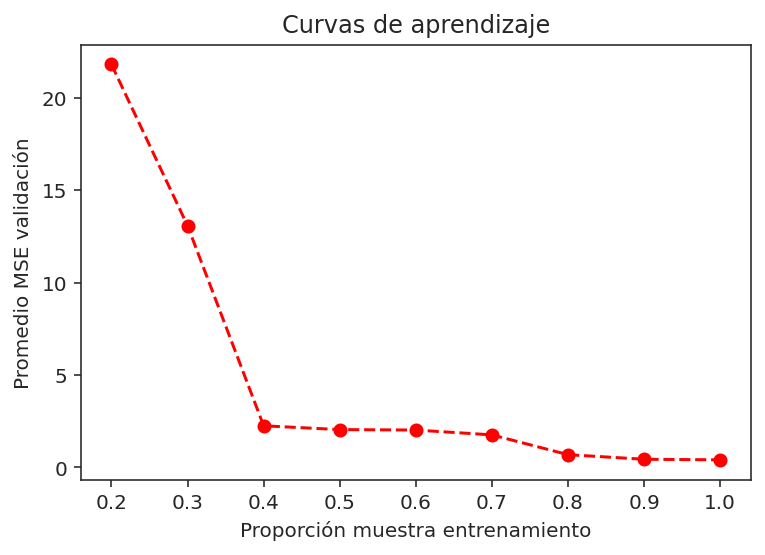

In [ ]:
# Gráfico de la curva de aprendizaje
plt.plot(size, -test_scores.mean(1), "o--", color="r", label="ML-validación")
plt.xlabel("Proporción muestra entrenamiento")
plt.ylabel("Promedio MSE validación")
plt.title("Curvas de aprendizaje")
plt.show()

Como se puede ver claramente en el gráfico a partir de un porcentaje del 50% de tamaño de muestra de entrenamiento, el valor del MSE se mantiene prácticamente estable. De hecho hasta el 90% no se produce una nueva disminución visible en el MSE promedio. Podemos considerar por tanto que un tamaño de muestra de entrenamiento del 80% proporcionará valores adecuados para el entrenamiento del modelo.

### HousingCA

Comenzamos con el proceso de validación cruzada utilizando $k=10$ y el $MSE$ para valorar la estabilidad de la solución. Cambiaremos el signo del score para pasarlos a valores positivos.

In [ ]:
# Planteamos el modelo
lr = LinearRegression()
# Entrenamos el modelo
lr.fit(X3, y3)
# Obtenemos los scores
score_val = pd.DataFrame(-1*cross_val_score(lr, X3, y3, cv=10, scoring ='neg_root_mean_squared_error'), columns=['score'])
# Describios los valores obtenidos
score_val.describe().T

,count,mean,std,min,25%,50%,75%,max
score,10.0,0.637508,0.127383,0.468595,0.531231,0.651531,0.74561,0.811039


En este caso la solución para la muestra de entrenamiento era de 0.60 para el RMSE, que de nuevo es muy compatible con las estimaciones obtenidas para las 10 subdivisiones consideradas. Podemos concluir que la solución obtenida es bastante estable.

Obtenemos ahora la curva de aprendizaje correspondiente a este banco de datos.

In [ ]:
# Curva de aprendizaje
size = np.linspace(0.2, 1, 9)
train_sizes, train_scores, test_scores = learning_curve(
    lr, X3, y3, train_sizes=size, scoring="neg_mean_squared_error", cv=10)

Ahora el gráfico de la curva de aprendizaje

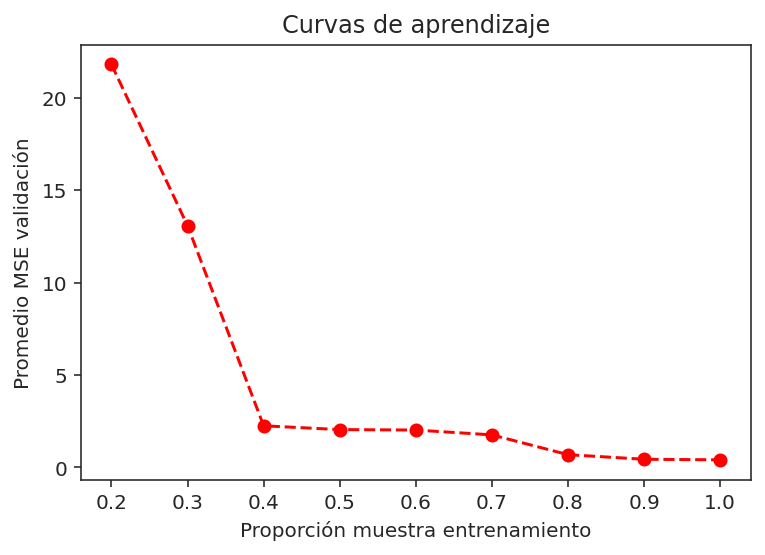

In [ ]:
# Gráfico de la curva de aprendizaje
plt.plot(size, -test_scores.mean(1), "o--", color="r", label="ML-validación")
plt.xlabel("Proporción muestra entrenamiento")
plt.ylabel("Promedio MSE validación")
plt.title("Curvas de aprendizaje")
plt.show()

A la vista del gráfico podemos ver que el valor óptimo para la muestra de entrenamiento es del 70%.

# <font color="steelblue">Selección de variables predictoras de interés</font>

En el aprendizaje automático, la selección de variables se utiliza para seleccionar un subconjunto de predictoras relevantes para su uso en la construcción del modelo, dado que todas las posibles predictoras no contienen información relevante sobre la respuesta. El objetvo que se persigue es obtener un modelo con el menor número de predictoras posibles pero con la misma capacidad explicativa o error que si trabajáramos con todas las predictoras posibles. Este es un paso importante en el proceso de un proyecto de aprendizaje automático por las siguientes razones:

* Para reducir el tiempo de entrenamiento, dado que el tiempo de entrenamiento y el número de posibles predictoras están altamente relacionados.
* Para evitar los problemas de dimensionalidad que aparecen cuando el número de predictoras es muy alto.
* Obtener modelos más sencillos donde las expresiones sean más manejables.
* Mejorar la generalización y reducir el sobreajuste.
* Reducir la colinealidad y mejorar la interpretabilidad.Para este punto estudiaremos más adelante los modelos de reducción de la dimensión.

Hay diferentes formas de realizar la selección de variables, aunque nos centraremos en el uso de la función [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selectkbest#sklearn.feature_selection.SelectKBest) de la clase `sklearn.feature_selection`. Otra función habitual (aunque no será utilizada por el momento) [VarianceThreshold](https://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold). A continuación se presentan ambas funciones y vemos su uso en los bancos de datos correspondientes a los ejemplos `Housing`y `HousingCA`.

Para seleccionar las k mejores variables basadas en alguna métrica, sólo se necesita proporcionar una función de puntuación para definir su métrica. Por suerte, sklearn proporciona algunas funciones de puntuación predefinidas. Para los problemas de regresión tratados aquí podemos utilizar las funciones `f_regression` y `mutual_info_regression`

* `f_classif`: valor F de ANOVA entre etiqueta/característica para tareas de clasificación.
* `mutual_info_classif`: información mutua para un objetivo discreto.
* `chi2`: estadísticas chi-cuadrado de características no negativas para tareas de clasificación.
* `f_regression`: valor F entre etiqueta/característica para tareas de regresión.
* `mutual_info_regression`: información mutua para un objetivo continuo.
* `SelectFpr`: selección de características basada en una prueba de tasa de falsos positivos.

La idea central aquí es calcular algunas métricas entre el objetivo y cada característica, ordenarlas y luego seleccionar las K mejores características.


En este caso utilizamos el test F para seleccionar las predictoras más relevantes. De hecho, no es tan importante el número de predictoras a seleccionar como que al eliminar alguna mantengamos nuestra capacidad explicativa. Para ello vamos a estudiar la evolución del MSE conforme aumentamos el número de predictoras en el modelo. A cotinuación, presentamos el código necesario para llevar a cabo este estudio tanto en los datos `Housing` como `HousingCA`.

Cargamos todos los módulos necesarios:





In [ ]:
import sklearn.feature_selection as fs
import sklearn.metrics as metrics

## <font color="steelblue">Housing</font>

Veamos el código necesario para llevar a cabo todo el proceso de selección.

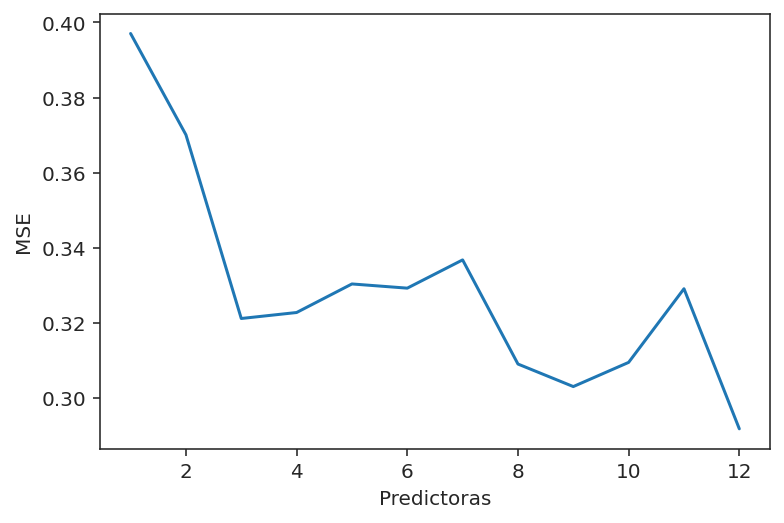

In [ ]:
# Medidas
n = X2.shape[1]
mse_list = []
for k in range(1, n):
    bk = fs.SelectKBest(fs.f_regression, k=k)
    bk.fit(X2, y2)
    X_trans = bk.transform(X2)
    train_x, test_x, train_y, test_y = train_test_split(X_trans,
                                                        y2,
                                                        test_size=0.2,
                                                        random_state=42)
    lr = LinearRegression()
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    f1 = metrics.mean_squared_error(test_y, y_pred)
    mse_list.append(f1)
# Gráfico
fig, ax = plt.subplots()
ax.plot(range(1, 13), mse_list)
ax.set_xlabel("Predictoras")
ax.set_ylabel("MSE");

Podemos ver como el mínimo en la curva de evolución (salvando el que obtenemos cuando consideramos todas las predictoras) se alcanza con 9 (0.31) predictoras cuyo valor está muy próximo también al de tres predictoras (0.32). Podríamos optar por una solución con tres predictoras para mantener un equilibrio entre capacidad explicativa y complejidad del modelo. 

Tan sólo nos faltaría obtener los nombres de las predictoras involucradas con el código siguiente (hemos establecido tres predictoras).

In [ ]:
# Selección de 3 predictoras
bk = fs.SelectKBest(fs.f_regression, k=3)
bk.fit(X2, y2)
cols=bk.get_support(indices=True)
X2_new=X2.iloc[:,cols]
X2_new.columns

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')

Las variables a considerar para la construcción de este modelo en las condiciones establecidas son: `RM`, `PTRATIO`, y `LSTAT`.

## <font color="steelblue">HousingCA</font>

Analizamos ahora los datos del ejemplo 3

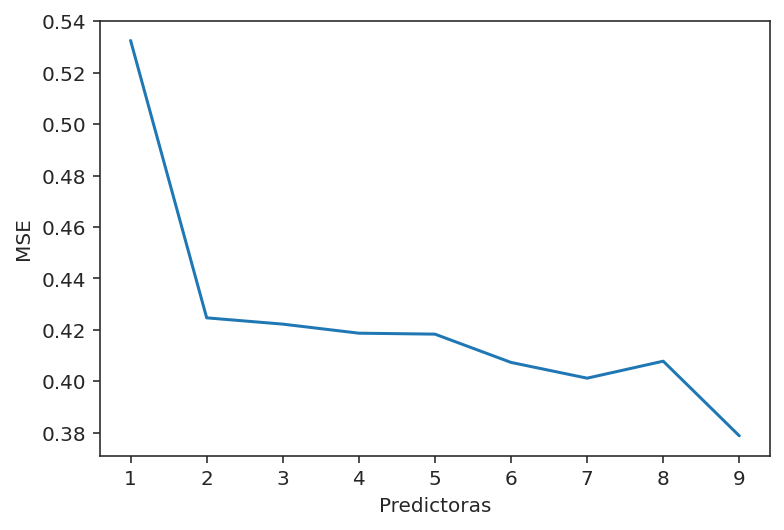

In [ ]:
# Medidas
n = X3.shape[1]
mse_list = []
for k in range(1, n):
    bk = fs.SelectKBest(fs.f_regression, k=k)
    bk.fit(X3, y3)
    X_trans = bk.transform(X3)
    train_x, test_x, train_y, test_y = train_test_split(X_trans,
                                                        y3,
                                                        test_size=0.2,
                                                        random_state=42)
    lr = LinearRegression()
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    f1 = metrics.mean_squared_error(test_y, y_pred)
    mse_list.append(f1)
# Gráfico
fig, ax = plt.subplots()
ax.plot(range(1, n), mse_list)
ax.set_xlabel("Predictoras")
ax.set_ylabel("MSE");

Podemos ver como entre 2 y 3 variables prácticamente no hay cambio en el MSE. Podemos optar en este caso por un modelo con 2 predictoras.

In [ ]:
# Selección de 2 predictoras
bk = fs.SelectKBest(fs.f_regression, k=2)
bk.fit(X3, y3)
cols=bk.get_support(indices=True)
X3_new=X3.iloc[:,cols]
X3_new.columns

Index(['median_income', 'ocean_proximity_INLAND'], dtype='object')

En este caso seleccionamos la variable numérica `median_income` y la codificada `ocean_proximity_INLAD` como las que más contribuyen a la explicación del comportamiento del precio medio de la vivienda. 

# <font color="steelblue">Ampliar conocimientos</font>

Se puede profundizar más sobre otros tipos de modelos lineales haciendo uso de la libreria `statmodels`. Esta librería contiene un apartado específico para los modelos lineales de regresión (https://www.statsmodels.org/stable/regression.html). 

Sin embargo, requiere de unos conocimientos estadísticos más avanzados tanto para el planteamiento de los modelos como su análisis. Se recomienda su uso en aquellos estudiantes con conocimientos de modelización estadística avanzada. 

# <font color="steelblue">Referencias y enlaces de interés</font>





Manuales

* Aurélien Géron (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems. O’Reilly Media.

* Peters Morgan (2018). Data Analysis From Scratch With Python: Beginner Guide using Python, Pandas, NumPy, Scikit-Learn, IPython, TensorFlow and Matplotlib. AI Sciences LLC.

* Sebastian Raschka, Vahid Mirjalili (2017). Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow. Packt Publishing.

* Julian Avila (2017). Scikit-Learn Cookbook: Over 80 Recipes for Machine Learning in Python With Scikit-Learn. Packt Publishing

Enlaces

* Scikit-Learn. Linear Models: https://scikit-learn.org/stable/modules/linear_model.html#

* Python Data Science Handbook: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb#scrollTo=rEF3UsBsJnuZ

* Nyandwi, J.D. Mahine Learning Complete. Linear Models for Regression: https://github.com/Nyandwi/machine_learning_complete/blob/main/6_classical_machine_learning_with_scikit-learn/1_linear_models_for_regression.ipynb

* Raschka, S. (2015). Python Machine Learning. Chapter 10: https://github.com/PacktPublishing/Python-Machine-Learning/blob/master/3547_10_Code.ipynb

* Amat, J. (2020). https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html